# Third Place Report [V2022]
### Contribution to Architectural Institute of Korea


-----
* Inital research, [MIT Media Lab, City Science](https://www.media.mit.edu/groups/city-science/overview/) <br>
  [Third Place Mobility Energy Consumption Per Person](http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab/index.html) <br>
   <br>

* Paper <br>
  [Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore](https://doi.org/10.1007/978-981-33-4400-6_11)  <br>
  

* Contribution <br> [대한건축학회 : Architectural Institute of Korea](https://www.aik.or.kr/)
  제3 공간 분석과 적용 (디자인, 데이터, 인공지능)  <br> https://brunch.co.kr/@njnamju/148 <br>


-----
#### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# 1. Parsing, Processing, Visualizing Data

### 1.1. Procssing JSON

In [1]:
import json
import glob

In [2]:
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data


In [3]:

THE_PATH = 'data/raw/Boston/' 
path = glob.glob(THE_PATH + "*.json") # load all third places data

dataDic = {}

for i in path:
    DATA_DIC = OpenJson(i)
    thirdPlaceName = (i.split('\\')[-1].split('.')[0]) # Class from third place names

    classList = []
    for i in DATA_DIC:
        if i not in classList:
            classList.append(i)

    dataDic[thirdPlaceName] = classList

In [4]:
print(dataDic['zoo'])

[{'lat': 42.302786, 'lon': -71.08681}, {'lat': 42.3028267, 'lon': -71.08769110000001}, {'lat': 42.3038148, 'lon': -71.0943459}, {'lat': 42.32797410000001, 'lon': -71.0672628}, {'lat': 42.30518939999999, 'lon': -71.0836683}, {'lat': 42.3101393, 'lon': -71.073919}, {'lat': 42.3228563, 'lon': -71.09620280000001}, {'lat': 42.2920594, 'lon': -71.0846765}, {'lat': 42.3114736, 'lon': -71.09444169999999}, {'lat': 42.3089348, 'lon': -71.1016576}]


In [5]:
for i in dataDic['zoo']:
    print('zoo', i)

for i in dataDic['cafe']:
    print('cafe', i)

zoo {'lat': 42.302786, 'lon': -71.08681}
zoo {'lat': 42.3028267, 'lon': -71.08769110000001}
zoo {'lat': 42.3038148, 'lon': -71.0943459}
zoo {'lat': 42.32797410000001, 'lon': -71.0672628}
zoo {'lat': 42.30518939999999, 'lon': -71.0836683}
zoo {'lat': 42.3101393, 'lon': -71.073919}
zoo {'lat': 42.3228563, 'lon': -71.09620280000001}
zoo {'lat': 42.2920594, 'lon': -71.0846765}
zoo {'lat': 42.3114736, 'lon': -71.09444169999999}
zoo {'lat': 42.3089348, 'lon': -71.1016576}
cafe {'lat': 42.3145051, 'lon': -71.10384429999999}
cafe {'lat': 42.300249, 'lon': -71.113075}
cafe {'lat': 42.33203909999999, 'lon': -71.0825661}
cafe {'lat': 42.337351, 'lon': -71.0482084}
cafe {'lat': 42.3325936, 'lon': -71.1179168}
cafe {'lat': 42.3005181, 'lon': -71.0598863}
cafe {'lat': 42.3334927, 'lon': -71.10569869999999}
cafe {'lat': 42.2909494, 'lon': -71.063056}
cafe {'lat': 42.3214931, 'lon': -71.0569546}
cafe {'lat': 42.33720110000001, 'lon': -71.1021311}
cafe {'lat': 42.3062371, 'lon': -71.1075644}
cafe {'lat

In [6]:
def SaveJson(path, d):
    with open(path, "w") as writeJSON:
        json.dump(d, writeJSON, ensure_ascii=False, indent=4)
SaveJson('./data/raw/google-third-place-Boston.json', dataDic) # save dictionary data as a JSON object

### 1.2. Processing CSV

In [7]:
table = []

for i in dataDic:
    for j in dataDic[i]:
        # print(j['lat'], j['lon'], i)
        table.append([j['lat'], j['lon'], i])

print(table[:10])

[[42.313595, -71.11385489999999, 'accounting'], [42.3224576, -71.0717772, 'accounting'], [42.28310320000001, -71.0714158, 'accounting'], [42.31151500000001, -71.08268799999999, 'accounting'], [42.3382101, -71.0502073, 'accounting'], [42.29823160000001, -71.060548, 'accounting'], [42.3072106, -71.1167633, 'accounting'], [42.3097003, -71.0830362, 'accounting'], [42.3368292, -71.0842931, 'accounting'], [42.31660369999999, -71.0645183, 'accounting']]


In [8]:
def SaveData(path, data):		
    text_file = open(path, "w")
    for d in data:
        myStr = ""
        for j in d:
            myStr += str(j) + ","
        myStr = myStr[:-1] + '\n'
        text_file.write(myStr)
        # break
    text_file.close()

SaveData('./data/raw/google-third-place-Boston.csv', table)

In [9]:
import pandas as pd
def SavePandasToCSV(path,d):
    d.to_csv(path, index=False, header=False, sep=',', encoding='utf-8')
    return "done!!"

path = './data/raw/google-third-place-Boston_df.csv'
SavePandasToCSV(path, pd.DataFrame(table))

'done!!'

### 1.3. Visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
CLASS_LIST = []

for i in dataDic:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)


import random
colors = []
for i in CLASS_LIST:
    r = random.random()
    g = random.random()
    b = random.random()
    colors.append([r,g,b, 1])

print(colors)


95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

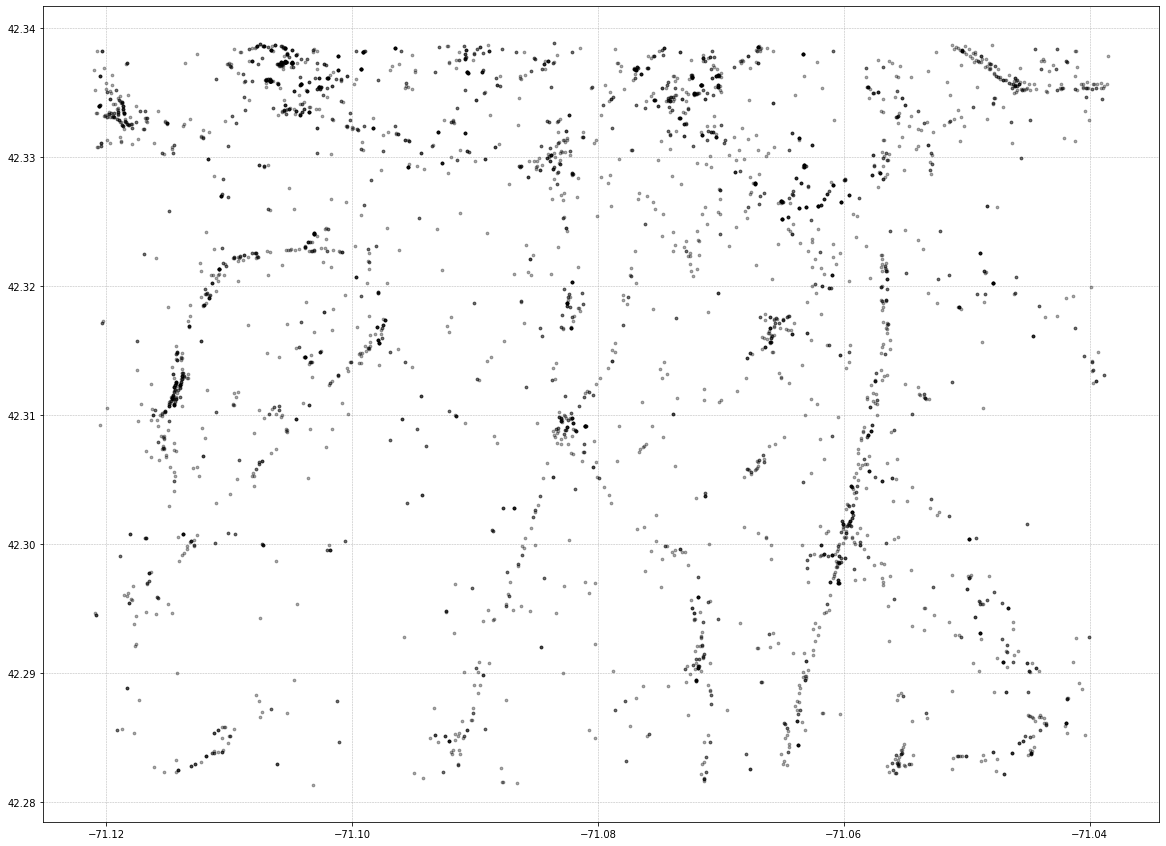

In [12]:
x = []
y = []
c = []

for i in dataDic:
    for pos in dataDic[i]:
        x.append(pos['lat'])
        y.append(pos['lon'])

plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, 0.33] )

In [13]:
import folium
import matplotlib

In [14]:
centerLat = 0
centerLon = 0
count = 0
for i in dataDic:
    for pos in dataDic[i]:
        centerLat += pos['lat']
        centerLon += pos['lon']
        count = count + 1
        # print (pos['lat'])
        # break
centerLat = centerLat / count
centerLon = centerLon / count

print(centerLat, centerLon)

42.318860482376486 -71.08187656014097


In [15]:
map = folium.Map(location=[centerLat, centerLon], zoom_start=14)


for i in dataDic:
    count = 0
    for pos in dataDic[i]:
        # print(i)

        cIndex = CLASS_LIST.index(i)
        # print(cIndex)
        c = colors[cIndex]
        # print(c)
        hex = matplotlib.colors.to_hex(c)
        # print(hex)

        folium.Marker(
            [pos['lat'], pos['lon']], 
            popup=i, 
            icon = folium.Icon(
                icon_color=hex,
                color='black',
                )).add_to(map)

        count += 1
        if (count > 10) :
            break
map

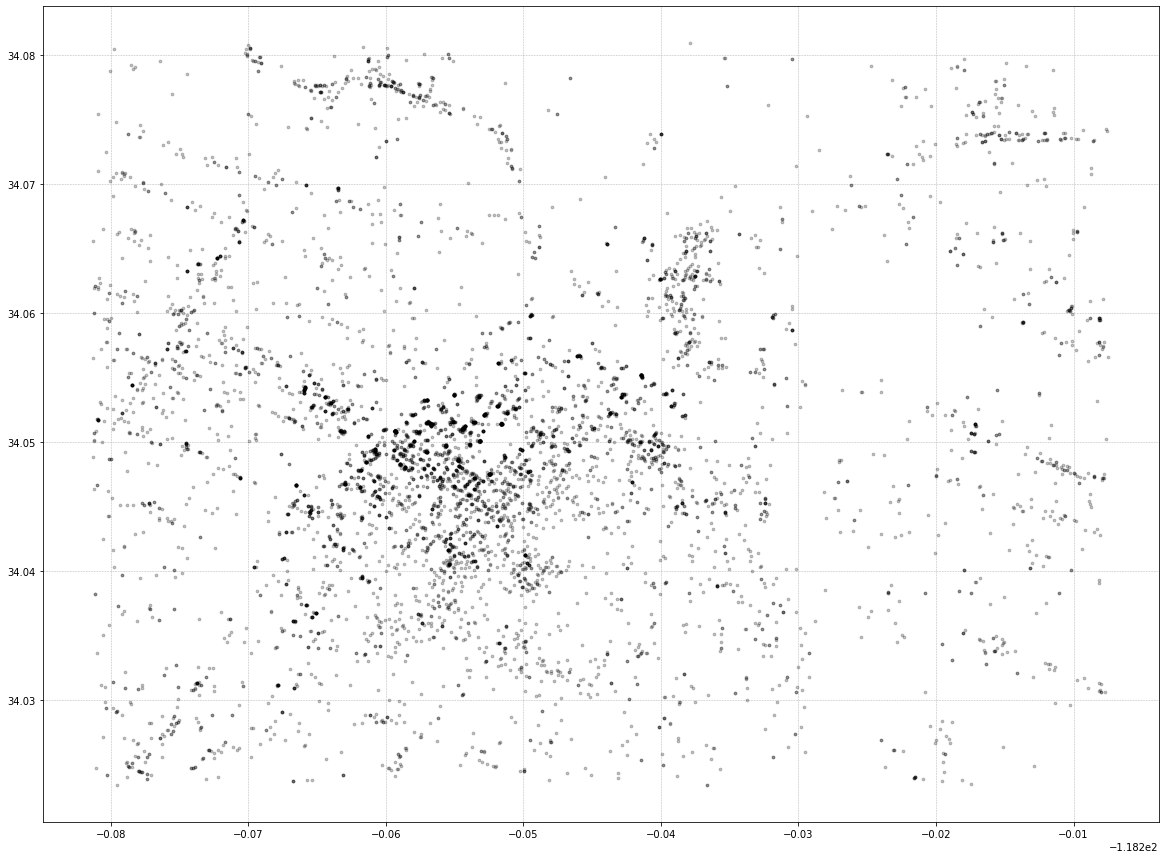

In [16]:
dataLA = OpenJson('data/raw/google-third-place-LA.json')

x = []
y = []
c = []

for i in dataLA:
    for pos in dataLA[i]:
        x.append(pos['lat'])
        y.append(pos['lon'])

plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, 0.23] )

In [17]:

centerLat = 0
centerLon = 0
count = 0
for i in dataLA:
    for j in dataLA[i]:
        lat = (j['lat'])
        lon = (j['lon'])
        centerLat+=lat
        centerLon+=lon
        count+=1

centerLat = centerLat / count
centerLon = centerLon / count

print(centerLat, centerLon)

34.050087178541176 -118.25194227630544


In [18]:
map = folium.Map(location=[centerLat, centerLon], tiles='CartoDB dark_matter', zoom_start=15, width = "100%", height="100%")

for i in dataLA:
    count = 0
    for j in dataLA[i]:
        lat = (j['lat'])
        lon = (j['lon'])

        cIndex = CLASS_LIST.index(i)
        # print(cIndex)
        c = colors[cIndex]
        # print(c)
        hex = matplotlib.colors.to_hex(c)

        folium.Marker(
            [lat, lon], 
            popup=i, 
            icon =  folium.Icon(
                color="darkblue",
                icon_color= hex,
                )
            ).add_to(map)
        
        count += 1
        
        if (count > 10):
            break
map

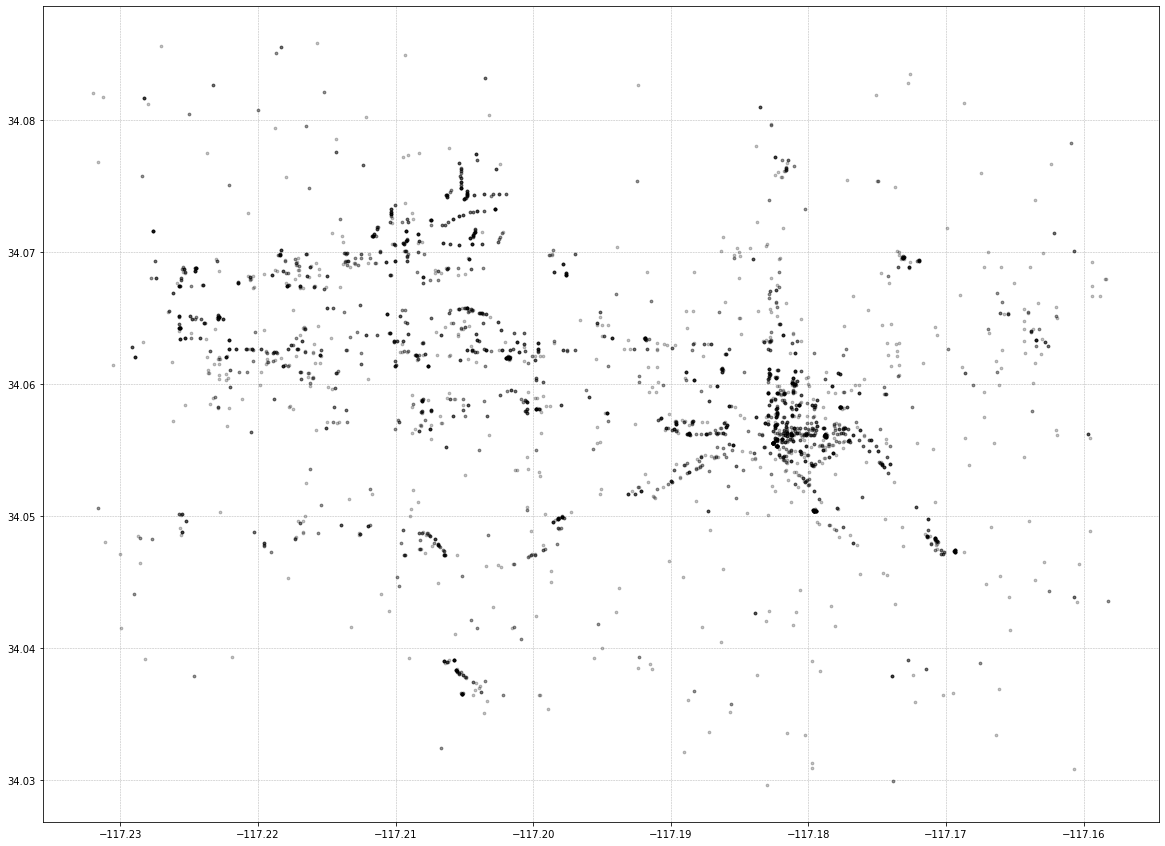

In [19]:
dataLA = OpenJson('data/raw/google-third-place-Redlands.json')

x = []
y = []
c = []

for i in dataLA:
    for pos in dataLA[i]:
        x.append(pos['lat'])
        y.append(pos['lon'])

plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, 0.23] )

In [20]:
centerLat = 0
centerLon = 0
count = 0
for i in dataLA:
    for j in dataLA[i]:
        lat = (j['lat'])
        lon = (j['lon'])
        centerLat+=lat
        centerLon+=lon
        count+=1

centerLat = centerLat / count
centerLon = centerLon / count

print(centerLat, centerLon)

34.05987053491918 -117.19513867446098


In [21]:
map = folium.Map(location=[centerLat, centerLon], tiles='CartoDB dark_matter', zoom_start=15, width = "100%", height="100%")

for i in dataLA:
    count = 0
    for j in dataLA[i]:
        lat = (j['lat'])
        lon = (j['lon'])

        cIndex = CLASS_LIST.index(i)
        # print(cIndex)
        c = colors[cIndex]
        # print(c)
        hex = matplotlib.colors.to_hex(c)

        folium.Marker(
            [lat, lon], 
            popup=i, 
            icon =  folium.Icon(
                color="darkblue",
                icon_color= hex,
                )
            ).add_to(map)
        
        count += 1
        
        if (count > 10):
            break
map

-----
# 2. Processing Data For Train

In [22]:
import math
import numpy as np

In [23]:
# THE_PATH = "data/raw/google-third-place-LA.json"
# THE_PATH = "data/raw/google-third-place-Redlands.json"
THE_PATH = "data/raw/google-third-place-Boston.json"

DATA_DIC = OpenJson(THE_PATH)

CLASS_LIST = []

for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

### 2.1. Distance

In [24]:
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d # * 1000; # // * 1000; // meters
    # return d; # // * 1000; // meters
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000

def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))

def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))

def GetDistance(loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 0

        for j in range(len(data[i])):
            otherLoc = data[i][j]
            # distanceValue = distance(loc, otherLoc) 
            # distanceValue = distanceGPS2KM(loc, otherLoc)
            distanceValue = distanceGPS2Meter(loc, otherLoc)

        if len(data[i]) != 0:
            distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [25]:
dataDic = DATA_DIC
dataSet = []

for i in CLASS_LIST:
    for j in range(len(dataDic[i])):
        loc = dataDic[i][j]
        
        result = GetDistance(loc, dataDic, CLASS_LIST)
        # print(CLASS_LIST.index(i))
        result.append(CLASS_LIST.index(i))
        dataSet.append(result)

In [26]:
dataframeDis = pd.DataFrame.from_records(dataSet, columns=[*CLASS_LIST, "class"] )
dataframeDis.describe()

accounting      airport  amusement_park     aquarium  art_gallery  \
count  4250.000000  4250.000000          4250.0  4250.000000       4250.0   
mean    391.634922   148.391511             0.0  1409.784673          0.0   
std     132.838228    80.399182             0.0   758.683482          0.0   
min       0.000000     0.000000             0.0     0.000000          0.0   
25%     288.532648    88.280443             0.0   834.822759          0.0   
50%     416.400280   144.136334             0.0  1402.671692          0.0   
75%     512.695518   202.771546             0.0  1961.169783          0.0   
max     618.351312   346.901468             0.0  3329.114624          0.0   

               atm       bakery         bank          bar  beauty_salon  ...  \
count  4250.000000  4250.000000  4250.000000  4250.000000        4250.0  ...   
mean     25.341249    51.507172    30.389901    58.172693           0.0  ...   
std       9.015695    26.669240    17.768890    25.636738           0.0  ...   
min       0.000000     0.000000     0.000000     0.000000           0.0  ...   
25%      18.938885    27.561392    15.729459    37.678472           0.0  ...   
50%      26.098693    55.137287    29.530846    57.908755           0.0  ...   
75%      32.291218    72.411576    43.559984    80.970643           0.0  ...   
max      43.437028   118.980618    72.002046   115.086716           0.0  ...   

             store  subway_station    synagogue  taxi_stand  train_station  \
count  4250.000000     4250.000000  4250.000000      4250.0         4250.0   
mean     17.718455      279.844092   202.181286         0.0            0.0   
std       9.607199      122.385187    87.811759         0.0            0.0   
min       0.000000        0.000000     0.000000         0.0            0.0   
25%      10.946632      191.166384   138.802795         0.0            0.0   
50%      16.324213      262.809376   189.340229         0.0            0.0   
75%      24.468034      401.209612   287.804858         0.0            0.0   
max      40.887783      525.837737   376.129680         0.0            0.0   

       travel_agency   university  veterinary_care          zoo        class  
count    4250.000000  4250.000000      4250.000000  4250.000000  4250.000000  
mean      119.046114    28.984708       264.952515   309.306728    48.547765  
std        42.249557    17.295763       112.442379   122.541246    25.867254  
min         0.000000     0.000000         0.000000     0.000000     0.000000  
25%        86.238786    14.534008       172.819848   237.245495    27.000000  
50%       123.773002    27.440812       280.021777   317.469264    50.000000  
75%       154.924832    42.324909       347.047541   378.641103    69.000000  
max       210.958485    69.777992       527.947092   611.579576    94.000000  

[8 rows x 96 columns]

96
atm


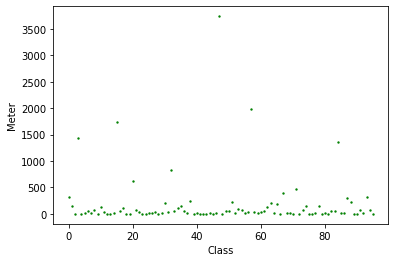

In [27]:
index = 100
dataVis = dataframeDis.iloc[index]
print(len(dataVis))
print(CLASS_LIST[int(dataVis[-1])])

x = np.arange(0.0, len(dataVis) , 1.0)
y = dataVis.transpose(); 
s = 2
plt.scatter(
    x, y, s, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.xlabel("Class")
plt.ylabel("Meter")
plt.show()

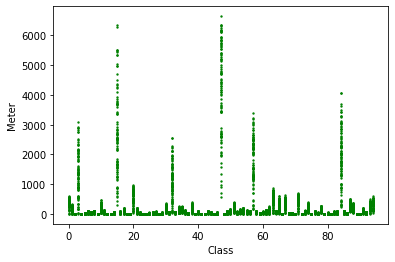

In [28]:
for i in range(100):
    # print (i)
    plt.scatter(
        x[:-1], dataframeDis.iloc[i][:-1], s, c="g", alpha=0.9, 
        marker= 'o',
    )
plt.xlabel("Class")
plt.ylabel("Meter")
plt.show()

id: 6
Num of bakery 57


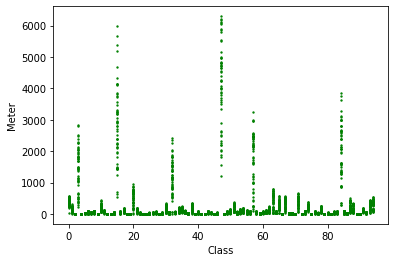

id: 14
Num of cafe 107


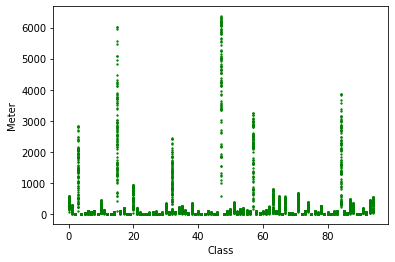

id: 49
Num of hospital 61


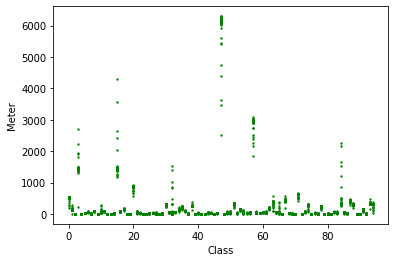

In [29]:
classList = ['bakery', 'cafe', 'hospital' ] 

for c in classList:

    classID = CLASS_LIST.index(c)
    # classID = CLASS_LIST.index("cafe")
    print('id:', classID)

    dataVis = dataframeDis.loc[dataframeDis['class'] == classID]

    # dataVis = dataframeDis['bakery']
    print("Num of", c , len(dataVis))
    # print(dataVis)

    x = range(len(dataVis.iloc[0]))
    for i in range(len(dataVis)):
        # print (x)
        plt.scatter(
            x[:-1], dataVis.iloc[i][:-1], s, c="g", alpha=0.9, 
            marker= 'o',
        )
    plt.xlabel("Class")
    plt.ylabel("Meter")
    plt.show()

In [30]:
dataframeDis.to_csv('data/processed/google-third-place-Boston_Distance.csv')

### 2.2. Decay

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0 m,  1.0
1 m,  0.99
2 m,  0.9801
3 m,  0.970299
4 m,  0.96059601
5 m,  0.9509900498999999
6 m,  0.941480149401
7 m,  0.9320653479069899
8 m,  0.9227446944279201
9 m,  0.9135172474836408
10 m,  0.9043820750088044
11 m,  0.8953382542587164
12 m,  0.8863848717161292
13 m,  0.8775210229989678
14 m,  0.8687458127689782
15 m,  0.8600583546412884
16 m,  0.8514577710948755
17 m,  0.8429431933839268
18 m,  0.8345137614500875
19 m,  0.8261686238355866
20 m,  0.8179069375972308
21 m,  0.8097278682212584
22 m,  0.8016305895390459
23 m,  0.7936142836436554
24 m,  0.7856781408072188
25 m,  0.7778213593991467
26 m,  0.7700431458051551
27 m,  0.7623427143471035
28 m,  0.7547192872036326
29 m,  0.7471720943315961
30 m,  0.7397003733882802
31 m,  0.7323033696543975
32 m,  0.7249803359578534
33 m,  0.7177305325982749
34 m,  0.7105532272722921
35 m,  0.7034476949995692
36 m,  0.6964132180495735
37 m,  0.6894490858690777
38 m,  0.682554595010387
39 m,  0.6757290490602831
40 m,  0.6689717585696803
41 m,  0

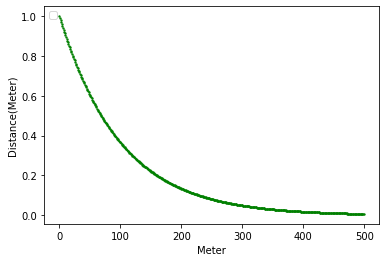

In [31]:
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)

decayList = [];
for i in range(0, 500, 1):
    print (i, 'm, ' , getDecay(i))
    decayList.append(getDecay(i))

x = np.arange(0.0, len(decayList) , 1.0)
y = decayList
s = 2
plt.scatter(
    x, y, s, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.xlabel("Meter")
plt.ylabel("Distance(Meter)")
plt.legend(loc='upper left')
plt.show()


In [32]:
def getDecay(cost, b = 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)

def getData(BETA):
    decayList = [];
    for i in range(0, 501, 1):
        if (i % 50 == 0 or i == 500):
            print (i, 'm, ' , getDecay(i, BETA) * 100)
        decayList.append(getDecay(i, BETA) * 100)

    x = np.arange(0.0, len(decayList) , 1.0)
    y = decayList
    return [x, y]
def vizDecay(x, y, BETA, color):
    plt.figure(figsize =(8 *0.4, 5 * 0.4), dpi=120)
    plt.title("β: " + str(BETA))
    plt.xlabel("Distance (Meter)")
    plt.ylabel("Probability (100%)")
    plt.plot( x, y, c=color, alpha=1, )
    plt.show()


0 m,  100.0
50 m,  36.41696800871168
100 m,  13.261955589475294
150 m,  4.829602124348767
200 m,  1.75879466057215
250 m,  0.6404996888794889
300 m,  0.23325056679514128
350 m,  0.08494278428992526
400 m,  0.03093358658057105
450 m,  0.011265074328993686
500 m,  0.004102398514547222


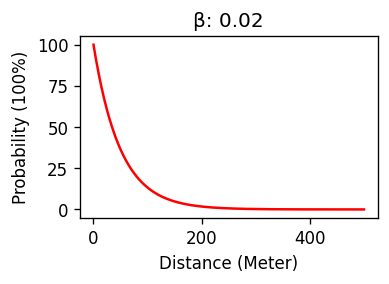

In [33]:
BETA_0 = 0.02
x0, y0 = getData(BETA_0)
vizDecay(x0, y0, BETA_0, 'r')

0 m,  100.0
50 m,  60.50060671375363
100 m,  36.60323412732292
150 m,  22.14517872388609
200 m,  13.397967485796173
250 m,  8.105851616218128
300 m,  4.9040894071285726
350 m,  2.96700384509771
400 m,  1.7950553275045138
450 m,  1.0860193639877882
500 m,  0.6570483042414603


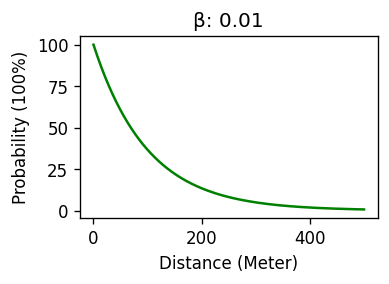

In [34]:
BETA_1 = 0.01
x1, y1 = getData(BETA_1)

vizDecay(x1, y1, BETA_1, "g")

0 m,  100.0
50 m,  81.84024506760997
100 m,  66.97825712726458
150 m,  54.81516977496729
200 m,  44.860869278059695
250 m,  36.71424535662421
300 m,  30.047028374584873
350 m,  24.590561657294565
400 m,  20.124975923831602
450 m,  16.47032961586129
500 m,  13.479358121064026


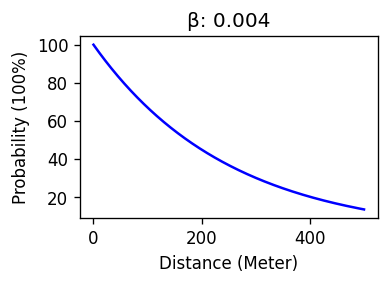

In [35]:
BETA_2 = 0.004
x2, y2 = getData(BETA_2)

vizDecay(x2, y2, BETA_2, "b")

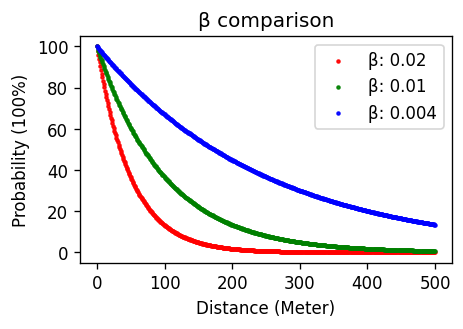

In [36]:
plt.figure(figsize =(8 * 0.5, 5 * 0.5), dpi=120)
plt.title("β comparison")
plt.xlabel("Distance (Meter)")
plt.ylabel("Probability (100%)")
plt.scatter(
    x0, y0, s = 3, c="r", alpha=0.9, 
    marker= 'o',
    )
plt.scatter(
    x1, y1, s = 3, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.scatter(
    x2, y2, s = 3, c="b", alpha=0.9, 
    marker= 'o',
    )
plt.legend(["β: {}".format(BETA_0), "β: {}".format(BETA_1), "β: {}".format(BETA_2)], loc ="upper right")
plt.show()

In [37]:
data = []

for i in range(0, len(x0), 25):
    dis0 = "{:.2f} %".format(y0[i])
    dis1 = "{:.2f} %".format(y1[i])
    dis2 = "{:.2f} %".format(y2[i])
    mile = "{:.3f}".format(i * 0.000621) 
    print( "{} Meter, {} Mile : {}, {}, {}".format(i, mile, dis0, dis1, dis2))
    data.append([i, mile, y0[i], y1[i], y2[i]])

0 Meter, 0.000 Mile : 100.00 %, 100.00 %, 100.00 %
25 Meter, 0.016 Mile : 60.35 %, 77.78 %, 90.47 %
50 Meter, 0.031 Mile : 36.42 %, 60.50 %, 81.84 %
75 Meter, 0.047 Mile : 21.98 %, 47.06 %, 74.04 %
100 Meter, 0.062 Mile : 13.26 %, 36.60 %, 66.98 %
125 Meter, 0.078 Mile : 8.00 %, 28.47 %, 60.59 %
150 Meter, 0.093 Mile : 4.83 %, 22.15 %, 54.82 %
175 Meter, 0.109 Mile : 2.91 %, 17.22 %, 49.59 %
200 Meter, 0.124 Mile : 1.76 %, 13.40 %, 44.86 %
225 Meter, 0.140 Mile : 1.06 %, 10.42 %, 40.58 %
250 Meter, 0.155 Mile : 0.64 %, 8.11 %, 36.71 %
275 Meter, 0.171 Mile : 0.39 %, 6.30 %, 33.21 %
300 Meter, 0.186 Mile : 0.23 %, 4.90 %, 30.05 %
325 Meter, 0.202 Mile : 0.14 %, 3.81 %, 27.18 %
350 Meter, 0.217 Mile : 0.08 %, 2.97 %, 24.59 %
375 Meter, 0.233 Mile : 0.05 %, 2.31 %, 22.25 %
400 Meter, 0.248 Mile : 0.03 %, 1.80 %, 20.12 %
425 Meter, 0.264 Mile : 0.02 %, 1.40 %, 18.21 %
450 Meter, 0.279 Mile : 0.01 %, 1.09 %, 16.47 %
475 Meter, 0.295 Mile : 0.01 %, 0.84 %, 14.90 %
500 Meter, 0.310 Mile : 0.0

In [38]:
df = pd.DataFrame(data, columns=['Distance(Meter)', "Distance(Mile)", "β : {}".format(BETA_0), "β : {}".format(BETA_1), "β : {}".format(BETA_2)])
df

Distance(Meter) Distance(Mile)    β : 0.02    β : 0.01   β : 0.004
0                 0          0.000  100.000000  100.000000  100.000000
1                25          0.016   60.346473   77.782136   90.465598
2                50          0.031   36.416968   60.500607   81.840245
3                75          0.047   21.976356   47.058664   74.037267
4               100          0.062   13.261956   36.603234   66.978257
5               125          0.078    8.003122   28.470777   60.592281
6               150          0.093    4.829602   22.145179   54.815170
7               175          0.109    2.914495   17.224993   49.588871
8               200          0.124    1.758795   13.397967   44.860869
9               225          0.140    1.061371   10.421225   40.583654
10              250          0.155    0.640500    8.105852   36.714245
11              275          0.171    0.386519    6.304905   33.213762
12              300          0.186    0.233251    4.904089   30.047028
13              325          0.202    0.140758    3.814505   27.182224
14              350          0.217    0.084943    2.967004   24.590562
15              375          0.233    0.051260    2.307799   22.245999
16              400          0.248    0.030934    1.795055   20.124976
17              425          0.264    0.018667    1.396232   18.206180
18              450          0.279    0.011265    1.086019   16.470330
19              475          0.295    0.006798    0.844729   14.899982
20              500          0.310    0.004102    0.657048   13.479358

In [39]:
def GetDistanceDecay(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0

        for j in range(len(data[i])):
            otherLoc = data[i][j]
            distanceValue = getDecay(distanceGPS2KM(loc, otherLoc), BATA)

        if len(data[i]) != 0:
            distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [40]:
dataDic = DATA_DIC
dataSet = []

BATA = 0.01;

for i in CLASS_LIST:
    for j in range(len(dataDic[i])):
        loc = dataDic[i][j]
        
        result = GetDistanceDecay(loc, dataDic, CLASS_LIST, BATA)
        # print(CLASS_LIST.index(i))
        result.append(CLASS_LIST.index(i))
        dataSet.append(result)

dataframeDecay = pd.DataFrame.from_records(dataSet, columns=[*CLASS_LIST, "class"] )
dataframeDecay.describe()

accounting      airport  amusement_park     aquarium  art_gallery  \
count  4250.000000  4250.000000          4250.0  4250.000000       4250.0   
mean      0.079499     0.048537             0.0     0.486087          0.0   
std       0.001279     0.000783             0.0     0.007401          0.0   
min       0.077345     0.046632             0.0     0.467636          0.0   
25%       0.078337     0.048003             0.0     0.480673          0.0   
50%       0.079252     0.048572             0.0     0.486100          0.0   
75%       0.080483     0.049121             0.0     0.491680          0.0   
max       0.083333     0.050000             0.0     0.500000          0.0   

               atm       bakery         bank          bar  beauty_salon  ...  \
count  4250.000000  4250.000000  4250.000000  4250.000000        4250.0  ...   
mean      0.008445     0.017036     0.009047     0.015821           0.0  ...   
std       0.000088     0.000260     0.000172     0.000249           0.0  ...   
min       0.008270     0.016388     0.008649     0.015277           0.0  ...   
25%       0.008377     0.016831     0.008918     0.015600           0.0  ...   
50%       0.008437     0.016998     0.009054     0.015822           0.0  ...   
75%       0.008507     0.017269     0.009189     0.016019           0.0  ...   
max       0.008696     0.017544     0.009346     0.016393           0.0  ...   

             store  subway_station    synagogue  taxi_stand  train_station  \
count  4250.000000     4250.000000  4250.000000      4250.0         4250.0   
mean      0.005813        0.080577     0.056833         0.0            0.0   
std       0.000093        0.001189     0.000853         0.0            0.0   
min       0.005591        0.078213     0.055162         0.0            0.0   
25%       0.005747        0.079397     0.056001         0.0            0.0   
50%       0.005826        0.080733     0.056951         0.0            0.0   
75%       0.005879        0.081434     0.057445         0.0            0.0   
max       0.005988        0.083333     0.058824         0.0            0.0   

       travel_agency   university  veterinary_care          zoo        class  
count    4250.000000  4250.000000      4250.000000  4250.000000  4250.000000  
mean        0.034540     0.008974         0.059903     0.096947    48.547765  
std         0.000411     0.000168         0.001086     0.001195    25.867254  
min         0.033656     0.008584         0.057413     0.094039     0.000000  
25%         0.034191     0.008844         0.059108     0.096266    27.000000  
50%         0.034492     0.008988         0.059748     0.096860    50.000000  
75%         0.034858     0.009114         0.060787     0.097644    69.000000  
max         0.035714     0.009259         0.062500     0.100000    94.000000  

[8 rows x 96 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


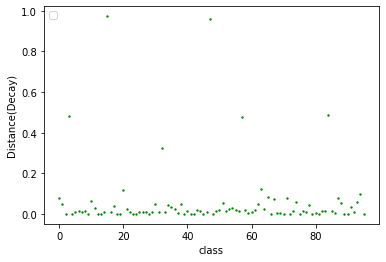

In [41]:
dataVis = dataframeDecay.iloc[0]
len(dataVis)

x = np.arange(0.0, len(dataVis) , 1.0)
y = dataVis.transpose(); 
s = 2
plt.scatter(
    x, y, s, c="g", alpha=0.9, 
    marker= 'o',
    )
plt.xlabel("class")
plt.ylabel("Distance(Decay)")
plt.legend(loc='upper left')
plt.show()

<AxesSubplot:>

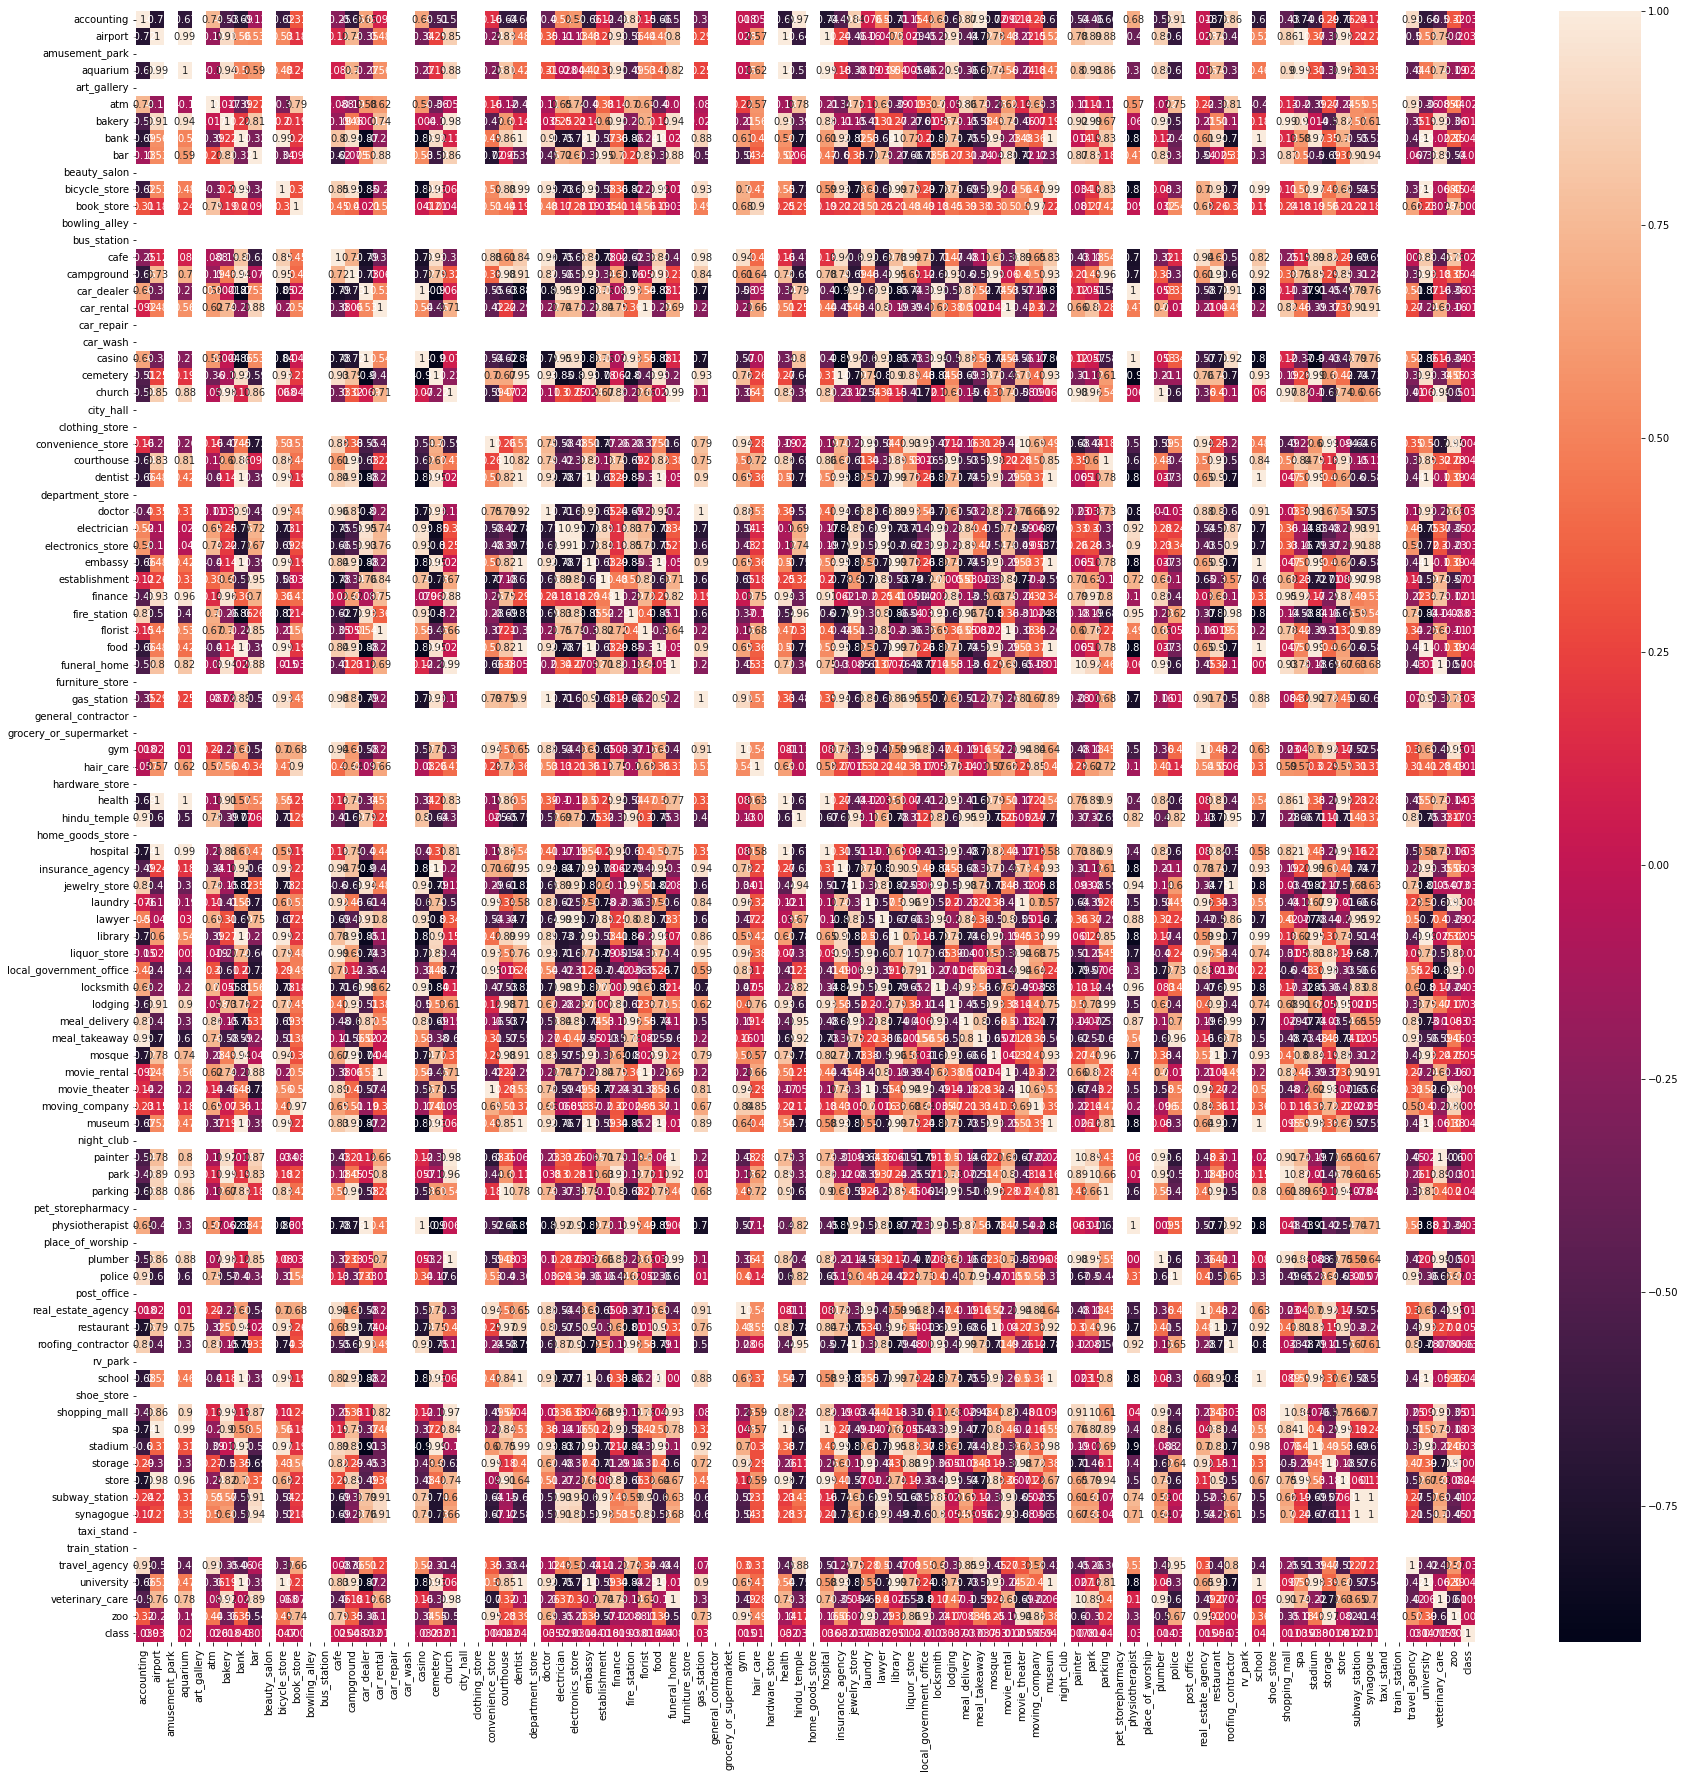

In [42]:
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(dataframeDecay.corr(),  annot=True)

In [43]:
dataframeDecay.to_csv('data/processed/google-third-place-Boston_Decay.csv')

-----
# 3. Models

In [44]:
import pandas as pd
import numpy as np

In [45]:
# df = pd.read_csv('data/processed/google-third-place-Boston_Distance.csv')
df = pd.read_csv('data/processed/google-third-place-Boston_Decay.csv')
df = df.iloc[:, 1:]
print(df.shape)

dataSet = df.to_numpy()

np.random.seed(222)
np.random.shuffle(dataSet)

X = dataSet[:,:-1]
y = dataSet[:,-1:].flatten()

(4250, 96)


In [46]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

XTrain, XTest, yTrain, yTest=train_test_split(X, y, test_size=0.2)
std_scale = StandardScaler()
std_scale.fit(XTrain)
XTrainStd = std_scale.transform(XTrain)
XTestStd  = std_scale.transform(XTest)

In [47]:
from sklearn.linear_model import LogisticRegression

lrL2 =  LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', random_state=2)
lrL2.fit(XTrainStd, yTrain)

print('coef:', lrL2.coef_)
print('intercept:', lrL2.intercept_)

coef: [[ 0.91756958 -0.05944009  0.         ... -0.22391507  0.21110626
  -0.6131506 ]
 [-0.32248873  0.34778619  0.         ...  0.44511826 -0.9495798
   0.95846699]
 [ 0.48944397  0.82329452  0.         ... -0.18838197  0.09287318
   0.35245769]
 ...
 [ 2.06600579  2.7807029   0.         ...  2.46090674 -1.04452805
  -0.28848623]
 [-0.09886895  0.11516122  0.         ... -0.30215102 -0.52007452
  -0.24275462]
 [ 0.68758486  0.11022276  0.         ...  0.28991559  0.18334954
   0.62543119]]
intercept: [-0.29223081 -0.30927202 -5.04821529  2.1396429   1.31529515  2.08258368
  0.91045487 -0.64321379  0.37253755  2.10299352 -6.24356797  1.04230333
 -0.96468269 -3.98475233  0.72982964  1.99620033  2.16111261  1.91382197
  1.57407119 -1.33585632 -0.75286151  1.65113277 -4.36607238  1.33005117
 -0.20947473  0.07937137  0.39026988  2.52847277 -0.29664531  1.04363459
  1.19647197  1.17934791  2.14038654 -6.29272354 -6.26756291  0.94052999
 -0.63048859  1.43469872  0.82587898  0.17359564  1.17

c:\Users\namju\miniconda3\envs\tf-gpu-2022\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
lrL2.coef_.shape

(71, 95)

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

pred_logistic = lrL2.predict(XTestStd)
print(pred_logistic)

print(precision_score(yTest, pred_logistic,  average='micro'))


[59. 86. 25. 86. 86. 22. 49. 92. 76. 92. 44. 76. 92. 16. 68. 25. 82. 29.
 49. 22. 80. 14. 29. 49. 82. 29. 92.  8. 37. 22. 25. 25. 86. 25. 37. 36.
 46. 29. 26. 49. 68. 25. 29. 68. 77.  7. 37. 25. 37. 92. 56. 33. 37. 59.
 92. 76. 27. 22. 92. 16.  7. 69. 82. 37. 46. 82. 25. 82. 25. 25. 80. 69.
 86. 22. 86. 22. 59. 25. 59. 22. 26. 86. 22. 82. 59.  8. 29. 92. 37. 49.
 22. 92. 37. 82. 16. 59. 68. 16. 22.  7. 25. 86. 37. 46. 56. 49. 37. 16.
 29. 92. 25. 82. 86. 16. 86. 25.  5.  7. 59. 68. 86. 25. 29. 86. 86. 86.
 82. 56. 86. 29. 22. 92. 49. 22. 86. 76. 86. 25. 76. 37. 59. 92. 82. 25.
 46. 56. 29. 86. 82. 77. 29. 59. 22. 92. 92. 25. 80. 59.  8. 29. 46. 26.
 25. 16. 16. 37. 25. 22. 29. 26. 86. 80. 22. 69. 37. 59. 56.  5. 29. 44.
 73. 37. 25. 73. 86. 22. 76. 22. 22. 25. 82. 22. 22. 69. 25. 86. 92. 77.
 36. 59. 59. 33. 59. 16. 22. 59. 29. 59. 36. 86. 25. 59. 59. 77. 29. 59.
 69. 77. 37. 69. 59. 68. 36. 49. 36. 26. 59. 33. 26. 22. 37. 33. 29. 49.
 26. 59. 22.  5. 77. 49. 33. 76. 37. 29. 86. 37. 68

In [50]:
print(lrL2.predict_proba(XTestStd))
print(confusion_matrix(yTest, pred_logistic))

[[1.28961871e-03 1.80986564e-03 3.35294843e-05 ... 1.39869941e-05
  5.54418278e-04 2.89030980e-03]
 [6.14561242e-03 1.18106535e-03 4.05977995e-06 ... 7.99882546e-04
  7.60716141e-04 7.58561552e-07]
 [4.50327789e-03 4.20628296e-03 4.14057370e-07 ... 2.50203677e-04
  4.62374933e-03 2.35822404e-08]
 ...
 [3.99019647e-03 4.22822202e-03 4.81843482e-06 ... 3.36424862e-08
  4.86319704e-03 4.06160082e-05]
 [1.19370376e-03 1.61721547e-04 6.36234282e-03 ... 1.13399807e-03
  5.87796207e-05 1.73850352e-02]
 [2.26078723e-04 6.50432789e-03 6.84099948e-08 ... 2.80515108e-02
  4.12984997e-04 2.05602753e-05]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 2 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm 

lrSVM = svm.SVC(kernel='linear', random_state=2)
lrSVM.fit(XTrainStd, yTrain)

SVC(kernel='linear', random_state=2)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predSVM = lrSVM.predict(XTestStd)
print(predSVM)
print(accuracy_score(yTest, predSVM))

[59. 86. 25. 86. 69. 22. 49. 29. 82. 29. 77. 82. 29. 86. 69. 25. 82. 29.
 49. 76. 25. 82. 29. 49. 86. 29. 29. 50. 59. 22. 86. 86. 86. 86. 37. 86.
 29. 29. 26. 49. 69. 25. 29. 69. 25. 22. 37. 22. 37. 92. 77. 59. 59. 59.
 92. 82. 50. 22. 92. 86. 22. 59. 59. 59. 49. 82. 86. 82. 25. 86. 86. 69.
 86. 22. 69. 86. 59. 86. 59. 22. 26. 86. 86. 59. 59. 50. 29. 92. 37. 49.
 22. 92. 59. 82. 86. 59. 69. 86. 22. 22. 86. 86. 37. 69. 77. 49. 29. 86.
 29. 92. 25. 82. 86. 86. 59. 25. 69. 69. 82. 69. 86. 25. 29. 86. 86. 86.
 86. 77. 86. 29. 82. 29. 49. 22. 69. 82. 86. 86. 50. 37. 59. 92. 82. 22.
 25. 77. 49. 69. 82. 86. 29. 59. 22. 92. 92. 86. 59. 59. 50. 29. 69. 26.
 86. 86. 86. 59. 25. 69. 29. 26. 86. 22. 76. 69. 37. 82. 77. 69. 49. 77.
 86. 37. 25. 86. 86. 22. 82. 82. 22. 86. 59. 22. 22. 69. 86. 86. 92. 59.
 86. 59. 59. 26. 59. 86. 22. 59. 29. 82. 86. 86. 86. 59. 59. 82. 29. 59.
 69. 86. 59. 59. 59. 69. 86. 49. 37. 26. 59. 26. 69. 22. 59. 26. 29. 49.
 26. 59. 86. 69. 86. 49. 33. 82. 86. 29. 86. 37. 69

In [53]:
print(confusion_matrix(yTest, predSVM))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


-----
# 4. Network

### 4.1. Distance(Euclidean )

In [54]:
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv('data/processed/google-third-place-Boston_Distance.csv')
df = df.iloc[:, 1:]
print(df.shape)
df

(4250, 96)


accounting     airport  amusement_park     aquarium  art_gallery  \
0     351.342910  212.782172               0  2046.132165            0   
1     393.168414   73.300915               0   554.994915            0   
2     105.389444  292.343756               0  2744.866030            0   
3     279.542938  141.751110               0  1256.667630            0   
4     582.196501   89.176082               0   919.879763            0   
...          ...         ...             ...          ...          ...   
4245  279.418138  142.181741               0  1245.259460            0   
4246  389.039181  123.703998               0  1160.306428            0   
4247   98.661848  248.395568               0  2314.343862            0   
4248  282.985873  164.042026               0  1509.318069            0   
4249  274.432731  193.324380               0  1812.482585            0   

            atm     bakery       bank        bar  beauty_salon  ...  \
0     25.630612  79.372232  27.099722  89.822595             0  ...   
1     17.789223  18.347615  27.694674  32.449432             0  ...   
2     22.151496  91.185641  61.403673  74.908706             0  ...   
3      6.512618  44.839890  30.880931  49.587767             0  ...   
4     38.472451  25.470148  39.157421  32.854811             0  ...   
...         ...        ...        ...        ...           ...  ...   
4245   6.510529  40.665173  35.651158  39.685746             0  ...   
4246  20.757348  49.316784  16.085028  65.332516             0  ...   
4247  13.070817  79.236547  49.324082  71.526850             0  ...   
4248  12.074005  57.087074  27.952222  64.820562             0  ...   
4249  15.981906  68.403974  30.119716  75.432792             0  ...   

          store  subway_station   synagogue  taxi_stand  train_station  \
0     23.863005      415.753190  303.246448           0              0   
1      9.866064      163.743385  118.602014           0              0   
2     35.869214      289.120908  216.341016           0              0   
3     17.064032      201.400672  152.418200           0              0   
4     13.205935      250.983592  167.901067           0              0   
...         ...             ...         ...         ...            ...   
4245  17.806213      141.609559  110.954999           0              0   
4246  13.267172      313.151023  227.843799           0              0   
4247  30.039008      279.203821  210.411830           0              0   
4248  18.934193      282.024382  209.299301           0              0   
4249  22.190718      332.222035  245.285075           0              0   

      travel_agency  university  veterinary_care         zoo  class  
0        100.503205   24.489798       398.290810  113.018534      0  
1        104.847970   26.440302       176.453737  288.369805      0  
2         75.395658   58.763839       393.296797  380.389007      0  
3         53.186176   28.673486       266.088893  158.781010      0  
4        190.749338   39.257103        45.569812  534.343304      0  
...             ...         ...              ...         ...    ...  
4245      59.436228   33.642709       239.440549  228.745478     94  
4246     101.186726   13.727441       290.878804  161.347015     94  
4247      25.917781   46.658658       372.019657  234.174497     94  
4248      56.846002   25.421180       315.780596   65.783087     94  
4249      61.059942   27.444714       356.674054    0.000000     94  

[4250 rows x 96 columns]

In [56]:
dataSet = df.to_numpy()

np.random.seed(222)
np.random.shuffle(dataSet)


Y = dataSet[:,-1:]
X = dataSet[:,:-1]

print('dim mat: ', X.shape)
print('dim class: ', Y.shape)

dim mat:  (4250, 95)
dim class:  (4250, 1)


In [57]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=30)

stdScaleDis = StandardScaler()
stdScaleDis.fit(X_train)
X_train = stdScaleDis.transform(X_train)
X_test  = stdScaleDis.transform(X_test)


In [59]:
Y_train_outHot = tf.keras.utils.to_categorical(Y_train)
Y_test_outHot = tf.keras.utils.to_categorical(Y_test)

xDim = X_train.shape[1]
yDim = Y_test_outHot.shape[1]

# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

modelDis = Sequential()
modelDis.add(Dense(1024, input_dim=xDim, activation='relu'))
modelDis.add(Dropout(0.5))
modelDis.add(Dense(512, activation='relu'))
modelDis.add(Dropout(0.5))
modelDis.add(Dense(yDim, activation='softmax'))
modelDis.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [60]:
import time
start_time = time.time()

hist = modelDis.fit( 
    X_train, Y_train_outHot, 
    validation_data=(X_test, Y_test_outHot), 
    batch_size=32,
    epochs=100, 
    )

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 4.1334 - accuracy: 0.0436 - val_loss: 3.9128 - val_accuracy: 0.0659
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 3.9633 - accuracy: 0.0549 - val_loss: 3.8480 - val_accuracy: 0.0659
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 3.9182 - accuracy: 0.0587 - val_loss: 3.8515 - val_accuracy: 0.0828
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8835 - accuracy: 0.0684 - val_loss: 3.8709 - val_accuracy: 0.0611
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8771 - accuracy: 0.0602 - val_loss: 3.8469 - val_accuracy: 0.0809
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8626 - accuracy: 0.0584 - val_loss: 3.8427 - val_accuracy: 0.0706
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8412 - accuracy: 0.0665 - val_loss: 3.8437 - val_accuracy: 0.0715

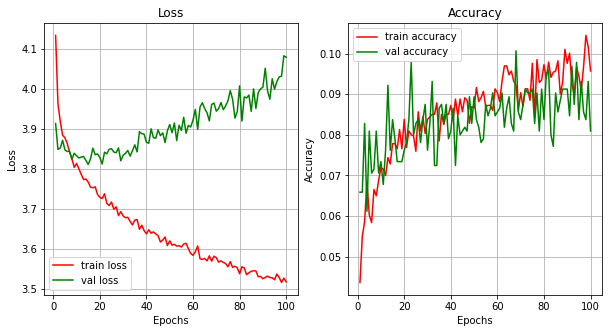

In [61]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

### 4.2. Decay model

In [62]:
df = pd.read_csv('data/processed/google-third-place-Boston_Decay.csv')
df = df.iloc[:, 1:]
print(df.shape)
df

(4250, 96)


accounting   airport  amusement_park  aquarium  art_gallery       atm  \
0       0.079876  0.047907               0  0.479853            0  0.008442   
1       0.079474  0.049269               0  0.494453            0  0.008519   
2       0.082281  0.047147               0  0.473160            0  0.008476   
3       0.080571  0.048595               0  0.487528            0  0.008630   
4       0.077683  0.049112               0  0.490840            0  0.008317   
...          ...       ...             ...       ...          ...       ...   
4245    0.080572  0.048591               0  0.487640            0  0.008630   
4246    0.079514  0.048772               0  0.488473            0  0.008490   
4247    0.082348  0.047565               0  0.477273            0  0.008565   
4248    0.080537  0.048378               0  0.485059            0  0.008575   
4249    0.080620  0.048094               0  0.482112            0  0.008537   

        bakery      bank       bar  beauty_salon  ...     store  \
0     0.016764  0.009077  0.015515             0  ...  0.005753   
1     0.017360  0.009072  0.016071             0  ...  0.005890   
2     0.016651  0.008749  0.015658             0  ...  0.005638   
3     0.017099  0.009041  0.015903             0  ...  0.005819   
4     0.017290  0.008960  0.016067             0  ...  0.005857   
...        ...       ...       ...           ...  ...       ...   
4245  0.017140  0.008994  0.015999             0  ...  0.005812   
4246  0.017055  0.009186  0.015750             0  ...  0.005856   
4247  0.016765  0.008863  0.015690             0  ...  0.005694   
4248  0.016979  0.009069  0.015755             0  ...  0.005801   
4249  0.016870  0.009048  0.015653             0  ...  0.005769   

      subway_station  synagogue  taxi_stand  train_station  travel_agency  \
0           0.079258   0.055853           0              0       0.034718   
1           0.081704   0.057644           0              0       0.034676   
2           0.080478   0.056689           0              0       0.034965   
3           0.081334   0.057311           0              0       0.035184   
4           0.080849   0.057160           0              0       0.033848   
...              ...        ...         ...            ...            ...   
4245        0.081922   0.057719           0              0       0.035122   
4246        0.080245   0.056578           0              0       0.034712   
4247        0.080574   0.056746           0              0       0.035455   
4248        0.080547   0.056757           0              0       0.035148   
4249        0.080060   0.056409           0              0       0.035106   

      university  veterinary_care       zoo  class  
0       0.009016         0.058623  0.098871      0  
1       0.008997         0.060752  0.097143      0  
2       0.008687         0.058670  0.096249      0  
3       0.008976         0.059882  0.098417      0  
4       0.008873         0.062044  0.094771      0  
...          ...              ...       ...    ...  
4245    0.008927         0.060139  0.097727     94  
4246    0.009122         0.059644  0.098391     94  
4247    0.008802         0.058871  0.097674     94  
4248    0.009007         0.059406  0.099341     94  
4249    0.008987         0.059016  0.100000     94  

[4250 rows x 96 columns]

In [63]:
dataSet = df.to_numpy()

np.random.seed(222)
np.random.shuffle(dataSet)

Y = dataSet[:,-1:]
X = dataSet[:,:-1]

print('dim mat: ', X.shape)
print('dim class: ', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=30)

stdScaleDecay = StandardScaler()
stdScaleDecay.fit(X_train)
X_train = stdScaleDecay.transform(X_train)
X_test  = stdScaleDecay.transform(X_test)

Y_train_outHot = tf.keras.utils.to_categorical(Y_train)
Y_test_outHot = tf.keras.utils.to_categorical(Y_test)

xDim = X_train.shape[1]
yDim = Y_test_outHot.shape[1]


modelDecay = Sequential()
modelDecay.add(Dense(1024, input_dim=xDim, activation='relu'))
modelDecay.add(Dropout(0.5))
modelDecay.add(Dense(512, activation='relu'))
modelDecay.add(Dropout(0.5))
modelDecay.add(Dense(yDim, activation='softmax'))
modelDecay.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

hist = modelDecay.fit( 
    X_train, Y_train_outHot, 
    validation_data=(X_test, Y_test_outHot), 
    batch_size=32,
    epochs=100, 
    )

dim mat:  (4250, 95)
dim class:  (4250, 1)
Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 4.1398 - accuracy: 0.0405 - val_loss: 3.9160 - val_accuracy: 0.0630
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 3.9593 - accuracy: 0.0483 - val_loss: 3.8778 - val_accuracy: 0.0527
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 3.9154 - accuracy: 0.0543 - val_loss: 3.8671 - val_accuracy: 0.0668
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 3.9012 - accuracy: 0.0615 - val_loss: 3.8533 - val_accuracy: 0.0724
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8731 - accuracy: 0.0659 - val_loss: 3.8521 - val_accuracy: 0.0837
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8515 - accuracy: 0.0609 - val_loss: 3.8347 - val_accuracy: 0.0621
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 3.8407 - accuracy: 0.060

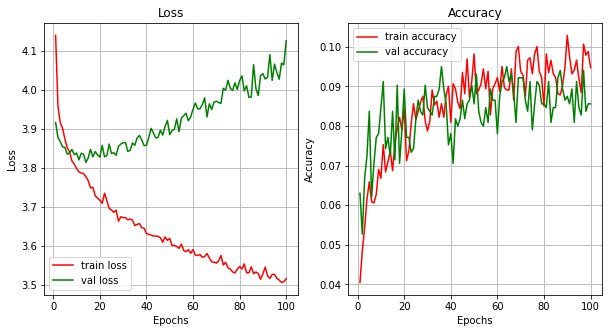

In [64]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

### 4.3. Prediction

In [65]:
import math
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d
def getDecay(cost, b= 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)
def GetDistanceDecay(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            distanceValue = getDecay(distanceGPS2KM(loc, otherLoc), BATA)
        if len(data[i]) != 0:
            distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))
def GetDistance(loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            # distanceValue = distance(loc, otherLoc) 
            # distanceValue = distanceGPS2KM(loc, otherLoc)
            distanceValue = distanceGPS2Meter(loc, otherLoc)
        if len(data[i]) != 0:
            distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [66]:
import json
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data   

THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)
CLASS_LIST = []
for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

In [67]:

# https://www.google.com/maps/@42.3334714,-71.0793878,16.46z
# https://www.google.com/maps/@42.345085,-71.0674257,17z
# https://www.google.com/maps/place/75-113+St+James+Ave+Parking/@42.3502316,-71.0760466,17.98z

locs = [
    { 'lat': 42.345085, 'lon':-71.0674257 },
    { 'lat': 42.3334714, 'lon':-71.0793878 },
    { 'lat': 42.341134, 'lon':-71.082955 },
    { 'lat': 42.3502316, 'lon':-71.0760466 },
]

resultsDis = []
resultsDecay = []
for i in locs:
    result = GetDistance(i, DATA_DIC, CLASS_LIST)
    resultsDis.append(result)
    
    result = GetDistanceDecay(i, DATA_DIC, CLASS_LIST)
    resultsDecay.append(result)

resultsDis = stdScaleDis.transform(resultsDis)
resultsDecay = stdScaleDecay.transform(resultsDecay)

In [68]:
predictionsDecay = modelDecay.predict(resultsDecay)
print(predictionsDecay.shape)

predictionsDis = modelDis.predict(resultsDis)
print(predictionsDis.shape)

(4, 95)
(4, 95)


In [69]:
for i in range(predictionsDis.shape[0]):
    print('model distance', CLASS_LIST[np.argmax(predictionsDis[i])]) 

print('------------------')

for i in range(predictionsDecay.shape[0]):
    print('model decay', CLASS_LIST[np.argmax(predictionsDecay[i])]) 


model distance local_government_office
model distance store
model distance university
model distance food
------------------
model decay food
model decay food
model decay university
model decay food


### 4.4. Decay model(Small)

In [70]:
df = pd.read_csv('data/processed/google-third-place-Boston_Decay.csv')
df = df.iloc[:, 1:]
print(df.shape)

(4250, 96)


In [71]:
dataSet = df.to_numpy()

subset = 1000
dataSet = dataSet[:subset]

np.random.seed(222)
np.random.shuffle(dataSet)

Y = dataSet[:,-1:]
X = dataSet[:,:-1]

print('dim mat: ', X.shape)
print('dim class: ', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=30)

stdScaleDecaySmall = StandardScaler()
stdScaleDecaySmall.fit(X_train)
X_train = stdScaleDecaySmall.transform(X_train)
X_test  = stdScaleDecaySmall.transform(X_test)

Y_train_outHot = tf.keras.utils.to_categorical(Y_train)
Y_test_outHot = tf.keras.utils.to_categorical(Y_test)

xDim = X_train.shape[1]
yDim = Y_test_outHot.shape[1]
print("num of class", yDim)


# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

modelDecay = Sequential()
modelDecay.add(Dense(95, input_dim=xDim, activation='relu'))
modelDecay.add(Dropout(0.6))
modelDecay.add(Dense(yDim, activation='softmax'))
modelDecay.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])



dim mat:  (1000, 95)
dim class:  (1000, 1)
num of class 27


In [72]:
hist = modelDecay.fit( 
    X_train, Y_train_outHot, 
    validation_data=(X_test, Y_test_outHot), 
    batch_size=126,
    epochs=200, 
    )

Epoch 1/200
6/6 [==============================] - 1s 31ms/step - loss: 3.8042 - accuracy: 0.0387 - val_loss: 3.3116 - val_accuracy: 0.0640
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 3.4120 - accuracy: 0.0613 - val_loss: 3.0898 - val_accuracy: 0.1040
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 3.2731 - accuracy: 0.0720 - val_loss: 2.9354 - val_accuracy: 0.1160
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 3.0728 - accuracy: 0.1200 - val_loss: 2.8308 - val_accuracy: 0.1400
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 2.9701 - accuracy: 0.1173 - val_loss: 2.7642 - val_accuracy: 0.1600
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 2.9336 - accuracy: 0.1227 - val_loss: 2.7131 - val_accuracy: 0.1600
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 2.8340 - accuracy: 0.1413 - val_loss: 2.6742 - val_accuracy: 0.1360
Epoch 8/200
6/6 [=========

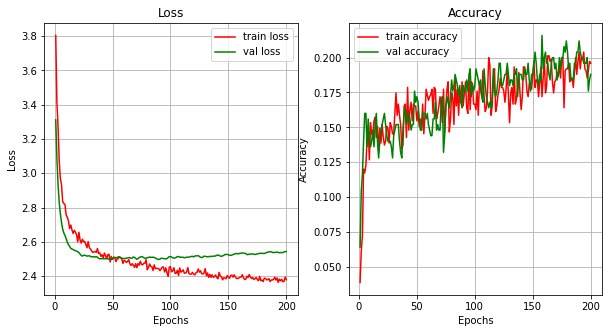

In [73]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

### 4.5. Prediction

In [74]:
dataDic = DATA_DIC

# https://www.google.com/maps/place/Boston,+MA/@42.3638848,-71.1082323,17.19z/
urls = [
    "https://www.google.com/maps/@42.334782,-71.0915467,17z",
    "https://www.google.com/maps/place/148+Chandler+St,+Boston,+MA+02116/@42.346544,-71.0760307,17z/data=!4m13!1m7!3m6!1s0x89e3652d0d3d311b:0x787cbf240162e8a0!2sBoston,+MA!3b1!8m2!3d42.3600825!4d-71.0588801!3m4!1s0x89e37a0d5fa20ab9:0xc78f93b589773cfa!8m2!3d42.3457342!4d-71.0748763",
    "https://www.google.com/maps/place/42%C2%B019'44.7%22N+71%C2%B003'07.6%22W/@42.329073,-71.0543087,656m/data=!3m2!1e3!4b1!4m6!3m5!1s0x0:0x8c44ced5796f96d9!7e2!8m2!3d42.3290732!4d-71.05212",
    "https://www.google.com/maps/place/Central+Square,+Cambridge,+MA+02139/@42.3525163,-71.0555899,139m",
]

locs = []
for url in urls:
    pos = url.split('@')[-1].split(',')
    loc = { 
        'lat': float(pos[0]), 
        'lon': float(pos[1]),
    }
    loc['valueByDecay'] = stdScaleDecay.transform([GetDistanceDecay(loc, dataDic, CLASS_LIST)])
    loc['valueByDis'] = stdScaleDis.transform([GetDistance(loc, dataDic, CLASS_LIST)])
    locs.append(loc)

In [75]:
for i in locs:
    resultDis = modelDis.predict([i["valueByDis"]])
    resultDecay = modelDecay.predict([i["valueByDecay"]])
    print('model by Distance:', CLASS_LIST[np.argmax(resultDis)], ', model by Decay:', CLASS_LIST[np.argmax(resultDecay)] )

model by Distance: park , model by Decay: church
model by Distance: food , model by Decay: bar
model by Distance: meal_delivery , model by Decay: convenience_store
model by Distance: insurance_agency , model by Decay: bar


In [76]:
# https://www.google.com/maps/place/Central+Square,+Cambridge,+MA+02139/@42.3525163,-71.0555899,17z/data=!4m5!3m4!1s0x89e3775417cd5a99:0x38b917035e7eaf3b!8m2!3d42.3655955!4d-71.1039952

loc = { 'lat': 42.3525163, 'lon':-71.0555899 }

result = GetDistanceDecay(loc, dataDic, CLASS_LIST)
result = stdScaleDecay.transform([result])
result = modelDecay.predict([result])

theSum = 0
for i in result[0]:
    # print(i)
    theSum = theSum + i

# print(theSum)

sort_order = tf.argsort(result[0], direction='DESCENDING') # ASCENDING or DESCENDING 
sort_order.numpy()

for i in sort_order.numpy():
    prob = result[0][i]
    print("id:", i, ", class:", CLASS_LIST[i] , ", probability:", prob, )

id: 8 , class: bar , probability: 0.23260069
id: 5 , class: atm , probability: 0.18863301
id: 25 , class: convenience_store , probability: 0.16534778
id: 7 , class: bank , probability: 0.110136844
id: 14 , class: cafe , probability: 0.06941946
id: 22 , class: church , probability: 0.061611764
id: 21 , class: cemetery , probability: 0.061522104
id: 17 , class: car_rental , probability: 0.028140713
id: 16 , class: car_dealer , probability: 0.017996825
id: 6 , class: bakery , probability: 0.016460042
id: 11 , class: book_store , probability: 0.0119926995
id: 26 , class: courthouse , probability: 0.011310292
id: 1 , class: airport , probability: 0.010712631
id: 20 , class: casino , probability: 0.007493646
id: 10 , class: bicycle_store , probability: 0.0061651594
id: 3 , class: aquarium , probability: 0.00024537308
id: 12 , class: bowling_alley , probability: 5.1136165e-05
id: 15 , class: campground , probability: 4.1611052e-05
id: 9 , class: beauty_salon , probability: 2.7339289e-05
id: 4

-----
# 5. Network and Implementation

### 5.1. Data processing 

In [77]:
import json
import math
import pandas as pd

PATH = 'data/processed/google-third-place-Boston_Decay.csv'
df = pd.read_csv(PATH, index_col=0) # remove the fist column

In [78]:
classList = ['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storepharmacy', 'physiotherapist', 'place_of_worship', 'plumber', 'police', 'post_office', 'real_estate_agency', 'restaurant', 'roofing_contractor', 'rv_park', 'school', 'shoe_store', 'shopping_mall', 'spa', 'stadium', 'storage', 'store', 'subway_station', 'synagogue', 'taxi_stand', 'train_station', 'travel_agency', 'university', 'veterinary_care', 'zoo']
print(classList)
print(classList.index('cafe'))
print(classList.index('bakery'))

['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storephar

In [79]:

food = pd.concat([
    df.loc[df['class'] == 14],
    df.loc[df['class'] == 6],
    df.loc[df['class'] == classList.index('restaurant')],
    df.loc[df['class'] == classList.index('meal_takeaway')],
 ])
food["class"] = 0
print(food.shape)

transportation = pd.concat([
    df.loc[df['class'] == classList.index('bicycle_store')],
    df.loc[df['class'] == classList.index('subway_station')],
    df.loc[df['class'] == classList.index('train_station')],
    df.loc[df['class'] == classList.index('gas_station')],
    df.loc[df['class'] == classList.index('car_repair')],
    df.loc[df['class'] == classList.index('car_wash')],
    df.loc[df['class'] == classList.index('car_rental')],
    df.loc[df['class'] == classList.index('taxi_stand')],
    df.loc[df['class'] == classList.index('bus_station')],
    df.loc[df['class'] == classList.index('parking')],
 ])
transportation["class"] = 1
print(transportation.shape)

utility = pd.concat([
    df.loc[df['class'] == classList.index('atm')],
    df.loc[df['class'] == classList.index('bank')],
    df.loc[df['class'] == classList.index('police')],
    df.loc[df['class'] == classList.index('post_office')],
    df.loc[df['class'] == classList.index('fire_station')],
    df.loc[df['class'] == classList.index('laundry')],
    # df.loc[df['class'] == classList.index('hospital')],
 ])
utility["class"] = 2
print(utility.shape)



(385, 96)
(291, 96)
(347, 96)


In [80]:
CLASS_LIST_REDUCED = ['food', 'transportation', 'utility']
data = pd.concat([food, transportation, utility])
data

accounting   airport  amusement_park  aquarium  art_gallery       atm  \
425     0.080101  0.048250               0  0.483449            0  0.008503   
426     0.080846  0.047448               0  0.475622            0  0.008456   
427     0.078746  0.049506               0  0.495295            0  0.008437   
428     0.077693  0.049037               0  0.490218            0  0.008316   
429     0.078266  0.048114               0  0.481028            0  0.008322   
...          ...       ...             ...       ...          ...       ...   
2254    0.078885  0.049312               0  0.494448            0  0.008447   
2255    0.078719  0.049511               0  0.496323            0  0.008434   
2256    0.080873  0.047728               0  0.478980            0  0.008502   
2257    0.079104  0.049364               0  0.495285            0  0.008475   
2258    0.079950  0.047850               0  0.479319            0  0.008442   

        bakery      bank       bar  beauty_salon  ...     store  \
425   0.016898  0.009104  0.015645             0  ...  0.005791   
426   0.016645  0.008950  0.015464             0  ...  0.005692   
427   0.017261  0.009191  0.015884             0  ...  0.005946   
428   0.017278  0.008946  0.016083             0  ...  0.005847   
429   0.016765  0.009206  0.015446             0  ...  0.005787   
...        ...       ...       ...           ...  ...       ...   
2254  0.017473  0.009014  0.016192             0  ...  0.005882   
2255  0.017544  0.009045  0.016129             0  ...  0.005905   
2256  0.016887  0.008800  0.015936             0  ...  0.005701   
2257  0.017459  0.009042  0.016146             0  ...  0.005892   
2258  0.016748  0.009064  0.015505             0  ...  0.005746   

      subway_station  synagogue  taxi_stand  train_station  travel_agency  \
425         0.079910   0.056316           0              0       0.034902   
426         0.079194   0.055788           0              0       0.034934   
427         0.080584   0.056866           0              0       0.034392   
428         0.080911   0.057209           0              0       0.033842   
429         0.078597   0.055424           0              0       0.034101   
...              ...        ...         ...            ...            ...   
2254        0.081846   0.057816           0              0       0.034377   
2255        0.081529   0.057586           0              0       0.034326   
2256        0.081887   0.057701           0              0       0.034816   
2257        0.081813   0.057763           0              0       0.034491   
2258        0.079226   0.055829           0              0       0.034733   

      university  veterinary_care       zoo  class  
425     0.009043         0.059094  0.099353      0  
426     0.008891         0.058243  0.098654      0  
427     0.009110         0.060437  0.097016      0  
428     0.008859         0.062162  0.094700      0  
429     0.009132         0.058703  0.097075      0  
...          ...              ...       ...    ...  
2254    0.008935         0.061391  0.096129      2  
2255    0.008963         0.061349  0.096157      2  
2256    0.008734         0.059704  0.096018      2  
2257    0.008964         0.061141  0.096525      2  
2258    0.009003         0.058566  0.098885      2  

[1023 rows x 96 columns]

In [81]:
import numpy as np

dataSet = data.to_numpy()

np.random.seed(222)
np.random.shuffle(dataSet)


Y = dataSet[:,-1:]
X = dataSet[:,:-1]

print('dim mat: ', X.shape)
print('dim class: ', Y.shape)
print(Y)

dim mat:  (1023, 95)
dim class:  (1023, 1)
[[2.]
 [2.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
X_train


array([[0.07977732, 0.04905038, 0.        , ..., 0.00904488, 0.0602287 ,
        0.0979612 ],
       [0.08047838, 0.04804752, 0.        , ..., 0.00899425, 0.05891722,
        0.09974227],
       [0.07813075, 0.04979825, 0.        , ..., 0.00905292, 0.06083371,
        0.09609054],
       ...,
       [0.08201817, 0.04754143, 0.        , ..., 0.00875439, 0.0591105 ,
        0.09683592],
       [0.07987687, 0.04860864, 0.        , ..., 0.00885547, 0.06075285,
        0.09638914],
       [0.08111172, 0.04829117, 0.        , ..., 0.00891081, 0.05968756,
        0.09818427]])

In [83]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X)

X_train = std_scale.transform(X_train)
X_test  = std_scale.transform(X_test)

X_train

array([[ 0.16956801,  0.69978857,  0.        , ...,  0.43462715,
         0.33398348,  0.79153858],
       [ 0.72449695, -0.60923109,  0.        , ...,  0.13037196,
        -0.89826002,  2.27909133],
       [-1.13379824,  1.67598629,  0.        , ...,  0.48298972,
         0.90244033, -0.77084233],
       ...,
       [ 1.94334567, -1.26983948,  0.        , ..., -1.3110108 ,
        -0.71665436, -0.14830222],
       [ 0.24836809,  0.12319204,  0.        , ..., -0.70355498,
         0.8264597 , -0.52144743],
       [ 1.22583137, -0.29120291,  0.        , ..., -0.37100696,
        -0.17446529,  0.97784826]])

In [84]:
import tensorflow as tf

Y_train_outHot = tf.keras.utils.to_categorical(Y_train)
Y_test_outHot = tf.keras.utils.to_categorical(Y_test)

xDim = X_train.shape[1]
yDim = Y_test_outHot.shape[1]
print(xDim)
print(yDim)

95
3


### 5.2. Network Model

In [85]:
# import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

smallModel = False
model = Sequential()
if (smallModel):
    model.add(Dense(8, input_dim=xDim, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(yDim, activation='softmax'))
else:
    model.add(Dense(96, input_dim=xDim, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.7))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(yDim, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit( 
    X_train, Y_train_outHot, validation_data=(X_test, Y_test_outHot), 
    batch_size=16,
    epochs=150, 
    )

Epoch 1/150
48/48 [==============================] - 1s 6ms/step - loss: 1.5235 - accuracy: 0.3664 - val_loss: 1.1344 - val_accuracy: 0.3906
Epoch 2/150
48/48 [==============================] - 0s 3ms/step - loss: 1.3305 - accuracy: 0.3259 - val_loss: 1.1033 - val_accuracy: 0.3672
Epoch 3/150
48/48 [==============================] - 0s 3ms/step - loss: 1.1833 - accuracy: 0.3742 - val_loss: 1.1089 - val_accuracy: 0.3438
Epoch 4/150
48/48 [==============================] - 0s 3ms/step - loss: 1.1690 - accuracy: 0.3729 - val_loss: 1.1014 - val_accuracy: 0.3477
Epoch 5/150
48/48 [==============================] - 0s 3ms/step - loss: 1.1553 - accuracy: 0.3703 - val_loss: 1.0914 - val_accuracy: 0.3867
Epoch 6/150
48/48 [==============================] - 0s 3ms/step - loss: 1.1303 - accuracy: 0.3559 - val_loss: 1.0903 - val_accuracy: 0.3945
Epoch 7/150
48/48 [==============================] - 0s 4ms/step - loss: 1.1139 - accuracy: 0.3781 - val_loss: 1.0930 - val_accuracy: 0.3828
Epoch 8/150
4

In [86]:
result = model.evaluate(X_test, Y_test_outHot)
print(result)

8/8 [==============================] - 0s 1ms/step - loss: 1.0803 - accuracy: 0.4141
[1.0803337097167969, 0.4140625]


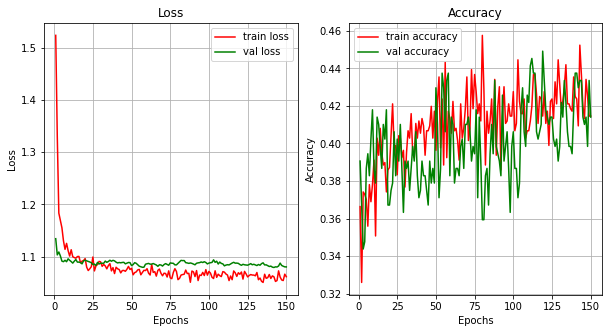

In [87]:
import matplotlib.pyplot as plt

historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

### 5.3. Prediction

In [88]:
model.save('./model/5_model_decay.hdf5')

In [89]:
result = model.predict(X_test)
print(np.argmax(result, axis=1))

[0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 1 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 1 0 0 0 0
 0 0 0 2 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 0 2 2 1 2 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 2 2 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0]


### 5.4. Implementation and Visualization

In [90]:
import math
def distanceGPS2KM(l0, l1): # get distance(KM)
    R = 6378.137; # Radius of earth in KM // a = Equatorial radius (6,378.1370 km) // b = Polar radius (6,356.7523 km)
    dLat = l1['lat'] * math.pi / 180 - l0['lat'] * math.pi / 180
    dLon = l1['lon'] * math.pi / 180 - l0['lon'] * math.pi / 180
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(l0['lat'] * math.pi / 180) * math.cos(l1['lat'] * math.pi / 180) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d
def getDecay(cost, b= 0.01): # { // 0.002 // 0.999
    return math.pow(1 - b, cost)
def GetDistanceDecay(loc, data, classList, BATA = 0.01):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            distanceValue = getDecay(distanceGPS2KM(loc, otherLoc), BATA)
        if len(data[i]) != 0:
            distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList
def distanceGPS2Meter(l0, l1):
    return distanceGPS2KM(l0, l1) * 1000
def distance2(x0, y0, x1, y1):
    return ((x1 - x0) * (x1 - x0)) + ((y1 - y0) * (y1 - y0))
def distance(l0, l1):
    return math.sqrt(distance2(l0['lon'], l0['lat'], l1['lon'], l1['lat']))
def GetDistance(loc, data, classList):
    distanceList = []
    for i in classList:
        distanceValue = 0
        for j in range(len(data[i])):
            otherLoc = data[i][j]
            # distanceValue = distance(loc, otherLoc) 
            # distanceValue = distanceGPS2KM(loc, otherLoc)
            distanceValue = distanceGPS2Meter(loc, otherLoc)
        if len(data[i]) != 0:
            distanceValue = distanceValue / len(data[i])
        distanceList.append(distanceValue)
    return distanceList

In [91]:
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data   
    
THE_PATH = "data/raw/google-third-place-Boston.json"
DATA_DIC = OpenJson(THE_PATH)

CLASS_LIST = []
for i in DATA_DIC:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)

dataDic = DATA_DIC

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

In [92]:
# https://www.google.com/maps/place/Boston,+MA/@42.3638848,-71.1082323,17.19z/
urls = [
    "https://www.google.com/maps/@42.334782,-71.0915467,17z",
    "https://www.google.com/maps/place/65+Warren+St,+Roxbury,+MA+02119/@42.3256513,-71.0880961,17z/data=!4m5!3m4!1s0x89e37a30760a320b:0xf9bf464d6bc712f5!8m2!3d42.3280122!4d-71.083529",
    "https://www.google.com/maps/place/42%C2%B019'36.3%22N+71%C2%B005'16.5%22W/@42.3267459,-71.0900917,17z/data=!3m1!4b1!4m6!3m5!1s0x0:0x4ed3e2c10c01eb8!7e2!8m2!3d42.3267423!4d-71.0879032",
    "https://www.google.com/maps/place/148+Chandler+St,+Boston,+MA+02116/@42.346544,-71.0760307,17z/data=!4m13!1m7!3m6!1s0x89e3652d0d3d311b:0x787cbf240162e8a0!2sBoston,+MA!3b1!8m2!3d42.3600825!4d-71.0588801!3m4!1s0x89e37a0d5fa20ab9:0xc78f93b589773cfa!8m2!3d42.3457342!4d-71.0748763",
    "https://www.google.com/maps/place/42%C2%B019'44.7%22N+71%C2%B003'07.6%22W/@42.329073,-71.0543087,656m/data=!3m2!1e3!4b1!4m6!3m5!1s0x0:0x8c44ced5796f96d9!7e2!8m2!3d42.3290732!4d-71.05212",
    "https://www.google.com/maps/place/Central+Square,+Cambridge,+MA+02139/@42.3525163,-71.0555899,139m",
]


dataX = []
for url in urls:
    pos = url.split('@')[-1].split(',')
    loc = { 
        'lat': float(pos[0]), 
        'lon': float(pos[1]),
        
    }
    print(loc)


    # loc['value'] = std_scale.transform([GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)])
    # # loc['value'] = GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)
    # print(loc['value'])
    dataX.append(GetDistanceDecay(loc, DATA_DIC, CLASS_LIST))

{'lat': 42.334782, 'lon': -71.0915467}
{'lat': 42.3256513, 'lon': -71.0880961}
{'lat': 42.3267459, 'lon': -71.0900917}
{'lat': 42.346544, 'lon': -71.0760307}
{'lat': 42.329073, 'lon': -71.0543087}
{'lat': 42.3525163, 'lon': -71.0555899}


In [93]:
dataXScaled = std_scale.transform(dataX) 

In [94]:
result = model.predict(dataXScaled)
resultIndex = np.argmax(result, axis=1)
print(result)
print(resultIndex)


[[0.3730869  0.35141918 0.27549398]
 [0.29341233 0.2942856  0.41230208]
 [0.31594256 0.31068203 0.37337536]
 [0.40938485 0.25377795 0.33683723]
 [0.41952425 0.21842454 0.3620512 ]
 [0.44136325 0.14057052 0.41806617]]
[0 2 2 0 0 0]


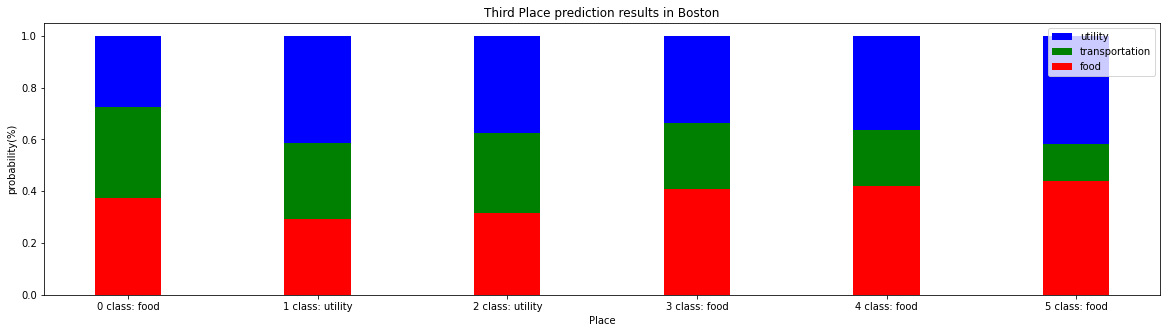

In [95]:
x = [str(i) + " class: " + CLASS_LIST_REDUCED[resultIndex[i]] for i in range(len(resultIndex))]
dataT = result.transpose()
y0 = dataT[0]
y1 = dataT[1]
y2 = dataT[2]

WIDTH = 0.35

plt.figure(figsize=(20,5))
plt.title('Third Place prediction results in Boston',fontsize=12)
plt.xlabel("Place")
plt.ylabel("probability(%)")
plt.bar(x, y0, color = 'r', width = WIDTH, label=CLASS_LIST_REDUCED[0])
plt.bar(x, y1, color = 'g', width = WIDTH, label=CLASS_LIST_REDUCED[1], bottom = y0)
plt.bar(x, y2, color = 'b', width = WIDTH, label=CLASS_LIST_REDUCED[2], bottom = y0 + y1)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc=1)
plt.show()

In [96]:
# https://www.google.com/maps/@42.3385469,-71.080132,15.65z
# https://www.google.com/maps/place/42%C2%B019'07.0%22N+71%C2%B003'32.5%22W/@42.318613,-71.0612077,17z/data=!3m1!4b1!4m6!3m5!1s0x0:0xc0f1b0b7ac5aad35!7e2!8m2!3d42.3186133!4d-71.0590189

locs = [
    [42.3395469, -71.102132],
    [42.318613, -71.059019],
]

num = 10
latInterval = (locs[1][0] - locs[0][0]) / num 
logInterval = (locs[1][1] - locs[0][1]) / num 

locations = []
for i in range(10):
    lat = locs[0][0] + i * latInterval 
    long = locs[0][1] + i * logInterval
    locations.append([lat, long])

locations


[[42.3395469, -71.102132],
 [42.33745351, -71.0978207],
 [42.335360120000004, -71.0935094],
 [42.33326673, -71.0891981],
 [42.33117334, -71.0848868],
 [42.32907995, -71.08057550000001],
 [42.32698656, -71.0762642],
 [42.32489317, -71.0719529],
 [42.32279978, -71.0676416],
 [42.32070639, -71.0633303]]

### 5.5. Application

In [97]:
import folium
import matplotlib

# https://www.google.com/maps/@42.3298053,-71.0526862,14.29z
# "OpenStreetMap",
# "Stamen Terrain", "Stamen Toner", "Stamen Watercolor",
# "CartoDB positron", "CartoDB dark_matter"

map = folium.Map(location=[42.3298053, -71.0526862], tiles='CartoDB dark_matter', zoom_start=14, width = "100%", height="100%")


for i in locations:
    lat = (i[0])
    lon = (i[1])

    # cIndex = CLASS_LIST.index(i)
    # print(cIndex)
    # c = colors[cIndex]
    # print(c)
    # hex = matplotlib.colors.to_hex(c)

    folium.Marker(
        [lat, lon], 
        popup=i, 
        icon =  folium.Icon(
            color="darkblue",
            # icon_color= hex,
            )
    ).add_to(map)


map

In [98]:
locs = []
for loc in locations:
    loc = { 
        'lat': loc[0], 
        'lon': loc[1],
    }
    print(loc)
    loc['value'] = std_scale.transform([GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)])
    # loc['value'] = GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)
    # print(loc['value'])
    locs.append(loc)

results = []
for i in locs:
    data = np.array(i["value"])
    # print(data)
    result = model.predict([data])
    results.append(result)
    # print(result)
    # resultDecay = modelDis.predict([i["value"]])
    print('prediction:', CLASS_LIST_REDUCED[np.argmax(result)], result  )
    # break

{'lat': 42.3395469, 'lon': -71.102132}
{'lat': 42.33745351, 'lon': -71.0978207}
{'lat': 42.335360120000004, 'lon': -71.0935094}
{'lat': 42.33326673, 'lon': -71.0891981}
{'lat': 42.33117334, 'lon': -71.0848868}
{'lat': 42.32907995, 'lon': -71.08057550000001}
{'lat': 42.32698656, 'lon': -71.0762642}
{'lat': 42.32489317, 'lon': -71.0719529}
{'lat': 42.32279978, 'lon': -71.0676416}
{'lat': 42.32070639, 'lon': -71.0633303}
prediction: food [[0.3779028  0.3551606  0.26693663]]
prediction: food [[0.37802303 0.35640597 0.26557097]]
prediction: food [[0.37443686 0.35312158 0.27244157]]
prediction: food [[0.37105137 0.34927517 0.27967343]]
prediction: food [[0.35571072 0.3399327  0.30435652]]
prediction: utility [[0.32566404 0.3215827  0.35275325]]
prediction: utility [[0.30291572 0.3049074  0.39217687]]
prediction: utility [[0.311461   0.28908116 0.39945784]]
prediction: utility [[0.35021526 0.2755363  0.37424845]]
prediction: food [[0.41511786 0.2568443  0.32803783]]


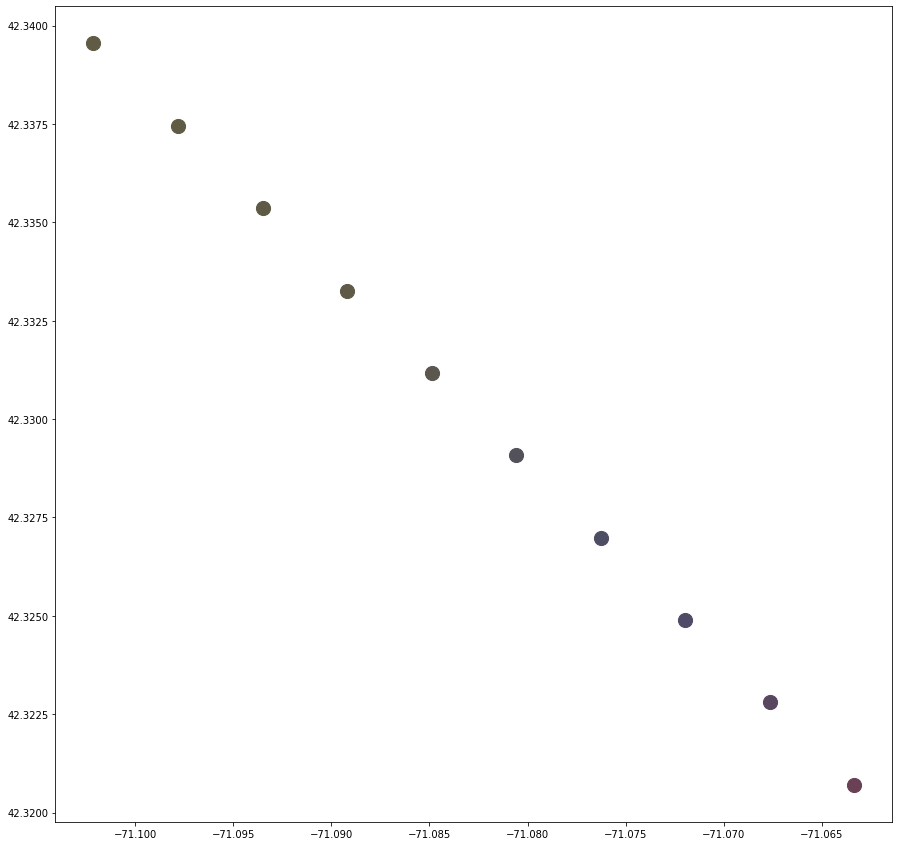

In [99]:
x = []
y = []
c = []

plt.figure(figsize=(15,15))

for i in range(len(locations)):
    y = locations[i][0]
    x = locations[i][1]
    c = results[i]


    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x, y, c = c, s = 200)    
  
plt.show()

In [100]:
THE_PATH = "data/raw/google-third-place-Boston.json"

DATA_DIC = OpenJson(THE_PATH)

minVal = [180, 180] 
maxVal = [-180, -180]

for i in DATA_DIC:
    for j in DATA_DIC[i]:
        lat = j['lat']
        lon = j['lon']
        if(minVal[0] > lat):
            minVal[0] = lat
        if(minVal[1] > lon):
            minVal[1] = lon

        if(maxVal[0] < lat):
            maxVal[0] = lat
        if(maxVal[1] < lon):
            maxVal[1] = lon
            
print(minVal, maxVal)

[42.2813503, -71.1210401] [42.3388374, -71.0385062]


In [101]:
numLat = 30
numLong = 40

latInterval = (maxVal[0] - minVal[0]) / (numLat - 1)
longInterval = (maxVal[1] - minVal[1]) / (numLong - 1)

geoPts = []
for lat in range(numLat):
    for lon in range(numLong):
        latPos = minVal[0] + (lat * latInterval)
        longPos = minVal[1] + (lon * longInterval)
        geoPts.append([latPos, longPos])

geoPts


[[42.2813503, -71.1210401],
 [42.2813503, -71.11892384615385],
 [42.2813503, -71.1168075923077],
 [42.2813503, -71.11469133846154],
 [42.2813503, -71.11257508461539],
 [42.2813503, -71.11045883076923],
 [42.2813503, -71.10834257692308],
 [42.2813503, -71.10622632307692],
 [42.2813503, -71.10411006923077],
 [42.2813503, -71.10199381538462],
 [42.2813503, -71.09987756153846],
 [42.2813503, -71.09776130769231],
 [42.2813503, -71.09564505384616],
 [42.2813503, -71.0935288],
 [42.2813503, -71.09141254615385],
 [42.2813503, -71.0892962923077],
 [42.2813503, -71.08718003846154],
 [42.2813503, -71.08506378461539],
 [42.2813503, -71.08294753076923],
 [42.2813503, -71.08083127692308],
 [42.2813503, -71.07871502307692],
 [42.2813503, -71.07659876923077],
 [42.2813503, -71.07448251538462],
 [42.2813503, -71.07236626153846],
 [42.2813503, -71.07025000769231],
 [42.2813503, -71.06813375384615],
 [42.2813503, -71.0660175],
 [42.2813503, -71.06390124615385],
 [42.2813503, -71.0617849923077],
 [42.2813

In [102]:
X = []
for loc in geoPts:
    loc = { 
        'lat': loc[0], 
        'lon': loc[1],
    }
    data = GetDistanceDecay(loc, DATA_DIC, CLASS_LIST)
    X.append(data)

stdX = std_scale.transform(X)


In [103]:
results = model.predict(stdX)
results

array([[0.26449162, 0.47148764, 0.26402077],
       [0.27103978, 0.46406558, 0.2648946 ],
       [0.2781108 , 0.4557019 , 0.26618728],
       ...,
       [0.449063  , 0.13403663, 0.41690037],
       [0.4417998 , 0.13543293, 0.4227673 ],
       [0.43479267, 0.13706411, 0.42814317]], dtype=float32)

### 5.6. Dominant Third Place in the area

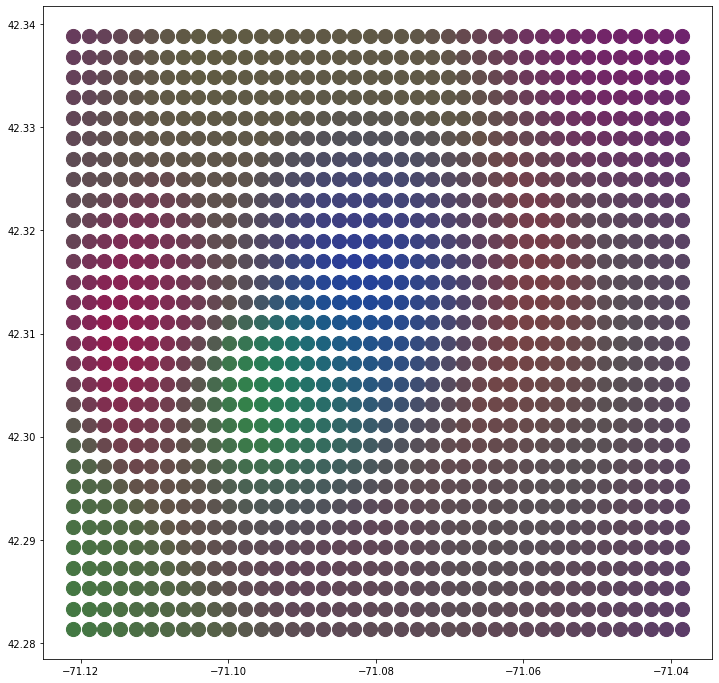

In [104]:
SCALE = 3
plt.figure(figsize=(4 * SCALE, 4 * SCALE))

for i in range(len(geoPts)):
    plt.scatter(
        x = geoPts[i][1],
        y = geoPts[i][0],
        c = [results[i]],
        s = 200)

plt.show()

In [105]:
def rgb_to_hex(col):
    return '%02x%02x%02x' % (int(col[0]*255),int(col[1]*255),int(col[2]*255))

map = folium.Map(location=[42.30051266666667, -71.0935288], tiles='CartoDB dark_matter', zoom_start=14, width = "100%", height="100%")

for i, geoPt in enumerate(geoPts):
    lat = (geoPt[0])
    lon = (geoPt[1])
    col = rgb_to_hex(list(results[i]))

    folium.Marker(
        [lat, lon], 
        popup="{}: {:.2f}, {}: {:.2f}, {}: {:.2f}".format(
            CLASS_LIST_REDUCED[0], results[i][0], 
            CLASS_LIST_REDUCED[1], results[i][1], 
            CLASS_LIST_REDUCED[2], results[i][2]),
        icon = folium.Icon(
            color="black",
            icon_color="#{}".format(col),
        )
    ).add_to(map)

map

In [106]:
results

array([[0.26449162, 0.47148764, 0.26402077],
       [0.27103978, 0.46406558, 0.2648946 ],
       [0.2781108 , 0.4557019 , 0.26618728],
       ...,
       [0.449063  , 0.13403663, 0.41690037],
       [0.4417998 , 0.13543293, 0.4227673 ],
       [0.43479267, 0.13706411, 0.42814317]], dtype=float32)

In [107]:
print("done!")

done!


-----
### References & Useful links

Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore. https://doi.org/10.1007/978-981-33-4400-6_11



Oldenburg, R., Brissett, (1982). D.: The third place. Qual. Sociol. 5(4), 265–284



Lee, Namju. (2022). Computational Design, Seoul, Bookk, https://brunch.co.kr/@njnamju/144



Lee, Namju, (2022). Discrete Urban Space and Connectivity, https://nj-namju.medium.com/discrete-urban-space-and-connectivity-492b3dbd0a81



Woo. Junghyun, (2022). Numeric Network Analysis for Pedestrians, https://axuplatform.medium.com/0-numeric-network-analysis-47a2538e636c



Lee, Namju, (2022). Computational Design Thinking for Designers, https://nj-namju.medium.com/computational-design-thinking-for-designers-68224bb07f5c



Lee, Namju. (2016). Third Place Mobility Energy Consumption Per Person, http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab 
